<a href="https://colab.research.google.com/github/elhamnadimi/social-network-analysis-proj/blob/main/py3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
load('/content/CISPRINWOSmatrices.RData')

In [ ]:
load('/content/CISPRINWOS_attributes.RData')

In [ ]:
ls(WOS)

[1] "AUTHOR"     "Citations"  "Code"       "H.Index"    "NumDocs"   
[6] "References" "Sector"

In [ ]:
install.packages("igraphdata")
install.packages("igraph")
install.packages("network")
install.packages("statnet")
install.packages("intergraph")
install.packages("dplyr")
install.packages("stringr")
install.packages("RColorBrewer")
install.packages("sand")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolve’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("igraphdata")
library("igraph")
library("network")
library("statnet")
library("intergraph")
library("dplyr")
library("stringr")
library("RColorBrewer")
library("sand")


In [ ]:
nodeWOS <- data.frame(WOS)
#nodePRIN
relationsp <- as.matrix(WOSFull)

WOS_graph = graph_from_adjacency_matrix(relationsp, mode="undirected",weighted = TRUE)
WOS_graph


IGRAPH 5aa38de UNW- 5291 427238 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 5aa38de (vertex names):
 [1] A0001--A0274  A0001--A0957  A0001--A1369  A0001--A1451  A0001--AW1426
 [6] A0001--S0577  A0001--S0662  A0002--A0217  A0002--A0965  A0002--A1229 
[11] A0002--A1653  A0002--A1805  A0002--A2104  A0002--A2108  A0002--S0071 
[16] A0002--S0319  A0002--S0479  A0004--A0069  A0004--A0305  A0004--A0394 
[21] A0004--A0587  A0004--A0630  A0004--A0642  A0004--A1285  A0004--A1489 
[26] A0004--A1641  A0004--S0314  A0005--A0462  A0005--A0714  A0005--A1341 
[31] A0005--A1704  A0005--AW0096 A0005--AW0206 A0005--AW0822 A0005--AW0966
[36] A0005--AW1271 A0005--AW1499 A0005--AW1516 A0005--AW1918 A0005--AW2306
+ ... omitted several edges

In [ ]:
allcodes_vec <- as.vector(V(WOS_graph)$name)#vector of all names of nodes in the PrinFull
External_authors<-str_subset(allcodes_vec, "A")
#External_authors
#Also we subset all codes that start from S-Italian authors from matrix with all names of nodes in the CISFull and save them as InternalCodes
InternalCodes<-str_subset(allcodes_vec, "S")
#InternalCodes

#Here we found what authors are representes in both tables CIS and CISFull and we will assign to them all given attributes.
Italiancodes_vec <- as.vector(nodeWOS$Code)#choose all codes from CIS dataframe-table of Italian statisticians.
Italian_authors <- intersect(InternalCodes,Italiancodes_vec)#intersection of Italian authors code from the previous table with the full matrix of egdes between codes. 
#Italian_authors

In [ ]:
#Here we found what authors are representes in both tables CIS and CISFull and we will assign to them all given attributes.
Italiancodes_vec <- as.vector(nodeWOS$Code)#choose all codes from CIS dataframe-table of Italian statisticians.
Italian_authors <- intersect(InternalCodes,Italiancodes_vec)#intersection of Italian authors code from the previous table with the full matrix of egdes between codes. 
#Italian_authors
#Here we found what authors are presented in relationship table CISFull, but not in attributes table CIS with codes similar to Italian statistitians, starting from S.
Unknown_italian_authors <- setdiff(InternalCodes,Italiancodes_vec)
#Unknown_italian_authors

In [ ]:
#Set of nodes attributes - Author names
vertex_attr(WOS_graph, "Author",index=V(WOS_graph)$name[V(WOS_graph)$name %in% Italian_authors]) <- as.character(nodeWOS$AUTHOR)
vertex_attr(WOS_graph, "Author",index=V(WOS_graph)$name[V(WOS_graph)$name %in% External_authors]) <- "External"
vertex_attr(WOS_graph, "Author",index=V(WOS_graph)$name[V(WOS_graph)$name %in% Unknown_italian_authors]) <- "Unknown"
#Set other attributes
vertex_attr(WOS_graph, "Sector",index=V(WOS_graph)$name[V(WOS_graph)$name %in% Italian_authors]) <- as.character(nodeWOS$Sector)
vertex_attr(WOS_graph, "H.Index",index=V(WOS_graph)$name[V(WOS_graph)$name %in% Italian_authors]) <- nodeWOS$H.Index
vertex_attr(WOS_graph, "NumDocs",index=V(WOS_graph)$name[V(WOS_graph)$name %in% Italian_authors]) <- nodeWOS$NumDocs
vertex_attr(WOS_graph, "References",index=V(WOS_graph)$name[V(WOS_graph)$name %in% Italian_authors]) <- nodeWOS$References
vertex_attr(WOS_graph, "Citations",index=V(WOS_graph)$name[V(WOS_graph)$name %in% Italian_authors]) <- nodeWOS$Citations
#set additional attribute type of authors-foreign/italian for futher plotting
vertex_attr(WOS_graph, "Author.Type",index=V(WOS_graph)$name[V(WOS_graph)$name %in% InternalCodes]) <- "Italian_researchers"
vertex_attr(WOS_graph, "Author.Type",index=V(WOS_graph)$name[V(WOS_graph)$name %in% External_authors]) <- "Foreign_researchers"

vertex.attributes(WOS_graph)
summary(WOS_graph)


$name
   [1] "A0001"  "A0002"  "A0004"  "A0005"  "A0006"  "A0011"  "A0012"  "A0013" 
   [9] "A0014"  "A0016"  "A0017"  "A0020"  "A0022"  "A0024"  "A0025"  "A0030" 
  [17] "A0034"  "A0039"  "A0041"  "A0046"  "A0047"  "A0049"  "A0050"  "A0057" 
  [25] "A0061"  "A0062"  "A0066"  "A0067"  "A0069"  "A0071"  "A0073"  "A0074" 
  [33] "A0076"  "A0077"  "A0082"  "A0084"  "A0086"  "A0087"  "A0088"  "A0089" 
  [41] "A0090"  "A0091"  "A0095"  "A0097"  "A0098"  "A0099"  "A0102"  "A0104" 
  [49] "A0105"  "A0106"  "A0107"  "A0109"  "A0110"  "A0114"  "A0116"  "A0119" 
  [57] "A0121"  "A0125"  "A0126"  "A0130"  "A0132"  "A0133"  "A0134"  "A0135" 
  [65] "A0137"  "A0139"  "A0141"  "A0142"  "A0144"  "A0150"  "A0152"  "A0155" 
  [73] "A0156"  "A0160"  "A0168"  "A0169"  "A0170"  "A0171"  "A0172"  "A0173" 
  [81] "A0174"  "A0175"  "A0176"  "A0177"  "A0178"  "A0179"  "A0182"  "A0184" 
  [89] "A0185"  "A0186"  "A0187"  "A0188"  "A0190"  "A0194"  "A0202"  "A0205" 
  [97] "A0206"  "A0208"  "A0209"  "A0212"  "A0217"  "A0218"  "A0220"  "A0223" 
 [105] "A0225"  "A0227"  "A0229"  "A0231"  "A0234"  "A0236"  "A0238"  "A0239" 
 [113] "A0240"  "A0241"  "A0242"  "A0243"  "A0245"  "A0247"  "A0251"  "A0252" 
 [121] "A0255"  "A0260"  "A0262"  "A0265"  "A0267"  "A0268"  "A0270"  "A0274" 
 [129] "A0275"  "A0276"  "A0279"  "A0280"  "A0281"  "A0283"  "A0284"  "A0289" 
 [137] "A0290"  "A0291"  "A0295"  "A0300"  "A0301"  "A0304"  "A0305"  "A0306" 
 [145] "A0309"  "A0310"  "A0314"  "A0315"  "A0316"  "A0317"  "A0320"  "A0321" 
 [153] "A0322"  "A0323"  "A0324"  "A0328"  "A0334"  "A0337"  "A0338"  "A0342" 
 [161] "A0343"  "A0344"  "A0346"  "A0348"  "A0352"  "A0361"  "A0362"  "A0363" 
 [169] "A0364"  "A0365"  "A0368"  "A0370"  "A0372"  "A0377"  "A0378"  "A0381" 
 [177] "A0382"  "A0383"  "A0384"  "A0391"  "A0392"  "A0394"  "A0400"  "A0401" 
 [185] "A0403"  "A0407"  "A0408"  "A0409"  "A0412"  "A0413"  "A0414"  "A0415" 
 [193] "A0421"  "A0424"  "A0425"  "A0426"  "A0430"  "A0432"  "A0433"  "A0435" 
 [201] "A0437"  "A0438"  "A0439"  "A0443"  "A0445"  "A0447"  "A0450"  "A0452" 
 [209] "A0453"  "A0455"  "A0459"  "A0460"  "A0461"  "A0462"  "A0466"  "A0470" 
 [217] "A0471"  "A0473"  "A0475"  "A0483"  "A0484"  "A0487"  "A0489"  "A0492" 
 [225] "A0495"  "A0497"  "A0498"  "A0499"  "A0502"  "A0503"  "A0504"  "A0507" 
 [233] "A0511"  "A0515"  "A0516"  "A0519"  "A0520"  "A0521"  "A0523"  "A0527" 
 [241] "A0528"  "A0531"  "A0535"  "A0537"  "A0538"  "A0541"  "A0546"  "A0548" 
 [249] "A0553"  "A0554"  "A0559"  "A0560"  "A0562"  "A0565"  "A0568"  "A0571" 
 [257] "A0572"  "A0575"  "A0576"  "A0581"  "A0587"  "A0590"  "A0591"  "A0597" 
 [265] "A0598"  "A0601"  "A0603"  "A0604"  "A0605"  "A0608"  "A0609"  "A0613" 
 [273] "A0617"  "A0618"  "A0621"  "A0622"  "A0625"  "A0626"  "A0627"  "A0629" 
 [281] "A0630"  "A0631"  "A0634"  "A0635"  "A0636"  "A0640"  "A0642"  "A0644" 
 [289] "A0645"  "A0649"  "A0651"  "A0652"  "A0653"  "A0656"  "A0664"  "A0666" 
 [297] "A0671"  "A0676"  "A0680"  "A0681"  "A0683"  "A0690"  "A0691"  "A0696" 
 [305] "A0698"  "A0700"  "A0701"  "A0705"  "A0706"  "A0707"  "A0711"  "A0713" 
 [313] "A0714"  "A0717"  "A0722"  "A0723"  "A0724"  "A0725"  "A0726"  "A0727" 
 [321] "A0728"  "A0730"  "A0732"  "A0733"  "A0735"  "A0738"  "A0739"  "A0741" 
 [329] "A0743"  "A0747"  "A0752"  "A0753"  "A0754"  "A0756"  "A0757"  "A0758" 
 [337] "A0761"  "A0762"  "A0764"  "A0766"  "A0772"  "A0776"  "A0778"  "A0779" 
 [345] "A0780"  "A0786"  "A0789"  "A0791"  "A0795"  "A0796"  "A0798"  "A0799" 
 [353] "A0801"  "A0808"  "A0813"  "A0816"  "A0818"  "A0821"  "A0822"  "A0823" 
 [361] "A0824"  "A0825"  "A0826"  "A0827"  "A0828"  "A0832"  "A0837"  "A0838" 
 [369] "A0839"  "A0841"  "A0842"  "A0847"  "A0852"  "A0854"  "A0855"  "A0859" 
 [377] "A0862"  "A0871"  "A0875"  "A0876"  "A0877"  "A0878"  "A0879"  "A0882" 
 [385] "A0883"  "A0885"  "A0886"  "A0887"  "A0890"  "A0891"  "A0895"  "A0898" 
 [393] "A0900"  "A0901"  "A0905"  "A0908"  "A0914"  "A0915"  "A0918"  "A0921" 
 [401] "A0923"  "A0924"  "A0927"  "A0928"  "

IGRAPH 5aa38de UNW- 5291 427238 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)


In [ ]:
vertex_attr_names(WOS_graph)


[1] "name"        "Author"      "Sector"      "H.Index"     "NumDocs"    
[6] "References"  "Citations"   "Author.Type"

In [ ]:
#transforming from Igraph to Network
WOS_NET<-asNetwork(WOS_graph)
WOS_NET

 Network attributes:
  vertices = 5291 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 427238 
    missing edges= 0 
    non-missing edges= 427238 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names not shown 

In [ ]:
#visualizing the Large network and as we can see the contrality is not in the center of graph.
my_pal <- brewer.pal(11,"Set3") #for color the plot

rolecat <- as.factor(get.vertex.attribute(WOS_NET,"Author.Type"))  # color based on Author.Type
par(mar=c(0,0,2,0))


sidenum <- 3:7 #shape based on Author.Type
gplot(WOS_NET,vertex.cex=1,
      edge.col="grey80",edge.lwd=0.02,
      thresh=0.01,jitter=TRUE,
      vertex.sides=sidenum[rolecat]
     ,cex.main=1.5,layout.fruchterman.reingold,
      vertex.col=my_pal[rolecat],main="Current Index to Statistics Database Network-WOSFull")

legend("bottomleft",legend=c("Italian_researchers","Foreign_researchers"),
col=my_pal[rolecat],pch=19,pt.cex=1.5,bty="n",
title="Authors")


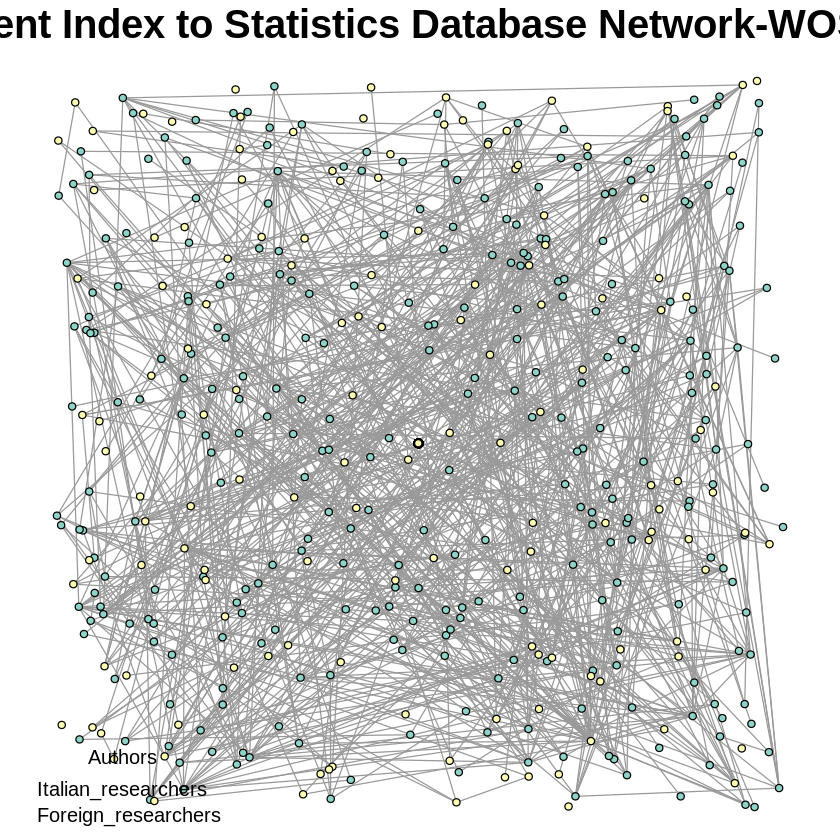

In [ ]:
#visualizing the Large network and as we can see the contrality is not in the center of graph.
my_pal <- brewer.pal(11,"Set3")
rolecat <- my_pal[as.numeric(as.factor(V(WOS_graph)$Author.Type))]

par(mar=c(0,0,2,0))
deg <- degree(WOS_NET,rescale=TRUE)
#V(WOS_graph)$size <- deg*3000
#V(WOS_graph)$color <-ifelse(V(WOS_graph)$Author.Type=="Italian_researchers","red", "blue")
l=layout.lgl(WOS_graph)
plot(WOS_graph,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,layout=l,vertex.size=2,vertex.color= my_color)
  title(main="Current Index to Statistics Database Network-WOSFull",
  sub="Large Graph Layout", cex.main=2)
  legend("bottomleft",legend=c("Italian_researchers","Foreign_researchers"),
col=my_pal[rolecat],pch=19,pt.cex=1.5,bty="n",
title="Authors")

AW1690 AW1729  AC046  S0605 AW1498  AC053  A2273 
  1234    893    892    890    889    888    888

[1] "External"     "External"     "External"     "External"     "External"    
[6] "External"     "SCRICCIOLO C"

              
               SECS-S/01
  External             0
  SCRICCIOLO C         1

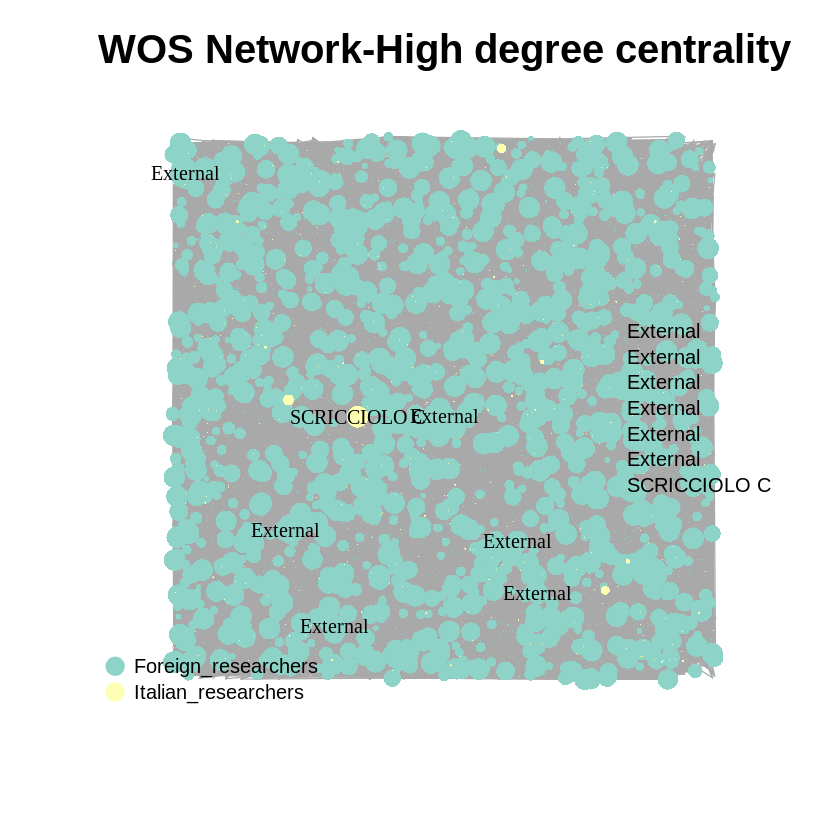

In [ ]:
my_pal <- brewer.pal(11,"Set3")
rolecat <- my_pal[as.numeric(as.factor(V(WOS_graph)$Author.Type))]


CIS_CI<- igraph::degree(WOS_graph)
sorted<-sort(CIS_CI, decreasing = FALSE)
max_citation<-sorted[c(5291,5290,5289,5288,5287,5286,5285)] #HIGHEST degree that I used to plot in the next code.
max_citation

V(WOS_graph)$Author[CIS_CI %in% max_citation]#authors that have the most degrees

#IN WHICH SECTOR DO AUTHORS WITH HIGH CITATION BELONG? they are mostly belong to sector 1.
table(V(WOS_graph)$Author[CIS_CI %in% max_citation],V(WOS_graph)$Sector[CIS_CI%in% max_citation])


#Plot the graph with node size equal to node degree
V(WOS_graph)$size <- CIS_CI*0.009
plot(WOS_graph,layout=layout.random,
vertex.frame.color=NA,vertex.label.color="black",
vertex.color= rolecat,vertex.label = ifelse(CIS_CI %in% max_citation ,
V(WOS_graph)$Author, NA),vertex.label.dist=0)

legend("bottomleft", legend=levels(as.factor(V(WOS_graph)$Author.Type)),
col = my_pal, bty = 'n', pch=20 , pt.cex = 3, cex = 1, text.col='black' ,
 horiz = FALSE)

legend("right", legend=as.character(V(WOS_graph)$Author[CIS_CI %in% max_citation]), 
bty = 'n', pch=NA_integer_ , pt.cex = 6, cex = 1, text.col='black' , 
horiz = FALSE)

title(main="WOS Network-High degree centrality", cex.main=2)



In [ ]:
table(degree(WOS_NET,gmode="graph")) #there is 26 isolated node and 
#there is 325 node with degree 886! also we can plot them


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
  26  247  363  287  274  243  272  290  257  222  170  157  163  142   82  114 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  41   62   60   23   26   32   44   20   22   20   23    4   24   12   13    6 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
  17   14    8    1    6    3    6   39    3    3    4    6   47    3    3   48 
  48   49   50   51   52   53   54   55   57   58   59   60   61   62   63   64 
   7    5    1    2    3    4    1    1    2    2    1    1    2    1    1    1 
  66   71   72   73   75   76   79   80   93   95  107  110  114  132  182  190 
   2    1    1    1    1    1    1    1    1    1    1    1    1    2    1    1 
 243  348  349  354  358  392  398  399  402  404  405  410  412  427  441  442 
  50  150    2    1    1    1  174    4    2    2    9    1    1    2    1    1 
 445  446  448  464  477  4

In [ ]:
it <- which(V(WOS_graph)$name %in% Italiancodes_vec) 
# Extract subgraph of italian researchers only
ll <- induced.subgraph(graph=WOS_graph,vids=it)
ll
l<-asNetwork(ll)
l

IGRAPH 219462c UNW- 469 399 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), color (v/c), weight (e/n)
+ edges from 219462c (vertex names):
 [1] S0040--S0050 S0051--S0056 S0022--S0057 S0053--S0057 S0001--S0067
 [6] S0055--S0071 S0001--S0074 S0063--S0075 S0072--S0075 S0077--S0092
[11] S0036--S0096 S0056--S0102 S0008--S0109 S0055--S0129 S0033--S0133
[16] S0124--S0150 S0002--S0164 S0003--S0166 S0033--S0166 S0055--S0166
[21] S0071--S0166 S0109--S0176 S0047--S0180 S0154--S0180 S0157--S0200
[26] S0090--S0201 S0033--S0210 S0074--S0211 S0150--S0211 S0015--S0213
+ ... omitted several edges

 Network attributes:
  vertices = 469 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 399 
    missing edges= 0 
    non-missing edges= 399 

 Vertex attribute names: 
    Author Author.Type Citations color H.Index NumDocs References Sector size vertex.names 

 Edge attribute names: 
    weight 

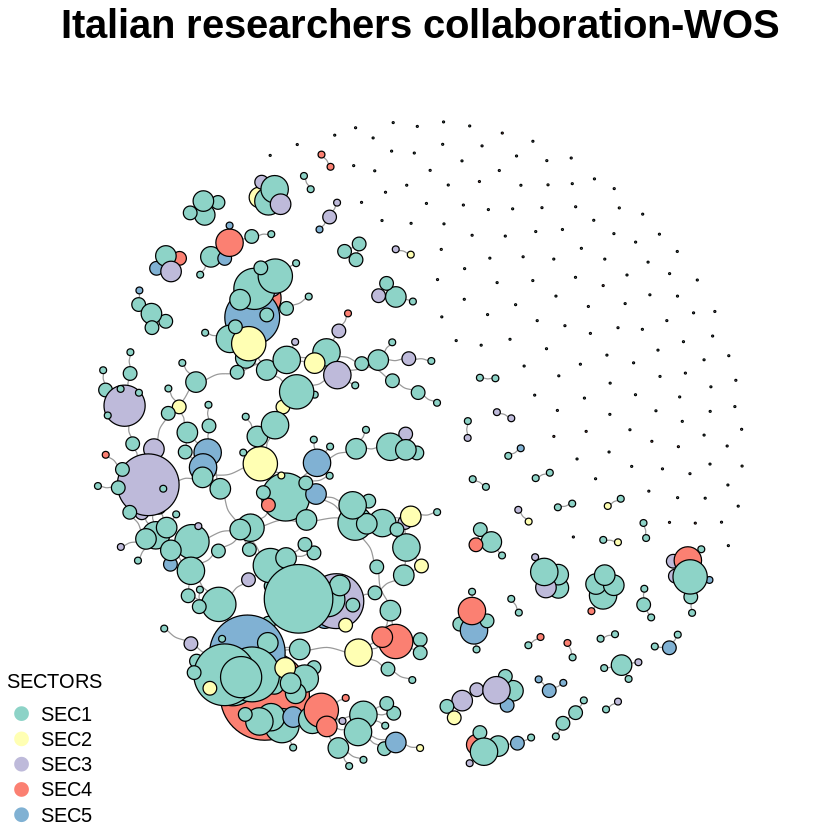

In [ ]:
#vidualizing based on the italian researchers and the size of node is proportional to degree.
my_pal <- brewer.pal(11,"Set3")

par(mar=c(0,0,2,0))

deg <- degree(l,rescale=TRUE)
V(ll)$size <- deg*1700

rolecat <- as.factor(get.vertex.attribute(l,"Sector"))
V(ll)$color<- my_pal[rolecat]

plot(ll,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers collaboration-WOS", cex.main=2)

legend("bottomleft",legend=c("SEC1","SEC2","SEC3","SEC4","SEC5"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="SECTORS")



In [ ]:
#NOTE:
# I couldnt run commented code on this data as it more big

#Basic Description
network.size(WOS_NET) #the # of authors
network.size(l) #the # of italian authors

gden(WOS_NET)
#components(WOS_NET) # split into various subgroups

#In the following code the largest component is extracted into a new matrix.
#The geodesics (shortest paths) are then calculated for each pair of nodes using the
#geodist() function. The maximum geodesic is then extracted,
# which is the diameter for this component.
#lgc <- component.largest(WOS_NET,result="graph")
#gd <- geodist(lgc)
#max(gd$gdist)

#count how many isolates there are:from this output.
#table(component.dist(WOS_NET)$csize)
#As we can see the number of isoletd node is 7.

length(V(WOS_graph)$name[igraph::degree(WOS_graph)==0]) #finding isolated
diameter(WOS_graph)#The longest shortest path


[1] 5291

[1] 469

[1] 0.03052857

[1] 26

[1] 16

In [ ]:

centralization(WOS_NET,degree, mode= "graph") 

#Closeness centrality-centrality based on distance to others in the graph
#CIS.clos<-igraph::closeness(PRIN_graph, mode="all")
centr_clo(WOS_graph, mode="all", normalized=T)

#Eigen centrality-centrality proportional to the sum of connection centralities
#CIS.eigen<-eigen_centrality(CIS_graph, directed=F)
centr_eigen(WOS_graph, directed=F, normalized=T)

[1] 0.2028184

Warning message in centr_clo(WOS_graph, mode = "all", normalized = T):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


$res
   [1] 0.0022459698 0.0022575666 0.0022536061 0.0022502327 0.0022446346
   [6] 0.0022578585 0.0022579838 0.0022527980 0.0022501839 0.0022536080
  [11] 0.0001892505 0.0022476130 0.0022395819 0.0022484910 0.0022519052
  [16] 0.0022480686 0.0022492156 0.0022395819 0.0022484910 0.0022576398
  [21] 0.0022431517 0.0022519090 0.0022366872 0.0022497858 0.0001893222
  [26] 0.0022557366 0.0022508933 0.0022545704 0.0022536061 0.0022484451
  [31] 0.0022501714 0.0022545819 0.0022443765 0.0022343046 0.0001899333
  [36] 0.0022508933 0.0022461262 0.0022504586 0.0022586172 0.0022586789
  [41] 0.0022545080 0.0022484910 0.0001893939 0.0022577506 0.0022529774
  [46] 0.0022545022 0.0022436217 0.0001893939 0.0022458172 0.0022349919
  [51] 0.0022562118 0.0022574105 0.0022395781 0.0022469743 0.0022550567
  [56] 0.0022562118 0.0022576649 0.0022461061 0.0022461061 0.0022462282
  [61] 0.0001893222 0.0022484461 0.0022457552 0.0022468741 0.0022522484
  [66] 0.0022492156 0.0022562061 0.0022505515 0.0001893222 0.0022546771
  [71] 0.0022484919 0.0022425773 0.0022578557 0.0022497810 0.0022495829
  [76] 0.0001893222 0.0022516512 0.0022486420 0.0022490435 0.0022475185
  [81] 0.0022476083 0.0001892505 0.0001893939 0.0022395781 0.0022558712
  [86] 0.0022584957 0.0022575887 0.0022574105 0.0022497810 0.0022484910
  [91] 0.0022484910 0.0022547463 0.0022484470 0.0022545358 0.0001892505
  [96] 0.0001901138 0.0022500403 0.0022591487 0.0022501714 0.0022434771
 [101] 0.0022577988 0.0022428588 0.0022502145 0.0022489986 0.0022465421
 [106] 0.0022587812 0.0022456799 0.0022504988 0.0022575685 0.0022574105
 [111] 0.0022519090 0.0022578181 0.0022544753 0.0022460585 0.0022461061
 [116] 0.0022489986 0.0022460032 0.0022491391 0.0022484910 0.0022480772
 [121] 0.0001890717 0.0001890717 0.0022386058 0.0022480686 0.0022608181
 [126] 0.0022508933 0.0022504586 0.0022459679 0.0022398768 0.0022395781
 [131] 0.0022457095 0.0022457095 0.0022512315 0.0022459803 0.0022430842
 [136] 0.0022578557 0.0022556731 0.0022576928 0.0022447908 0.0022343094
 [141] 0.0022481565 0.0022428673 0.0022580667 0.0022544647 0.0022514059
 [146] 0.0022504586 0.0022492137 0.0022495762 0.0022544762 0.0022465449
 [151] 0.0022445413 0.0022516512 0.0022576986 0.0022505515 0.0022591313
 [156] 0.0022492042 0.0022502279 0.0001891789 0.0001890359 0.0022504586
 [161] 0.0022514241 0.0022546771 0.0022476149 0.0022546771 0.0022562118
 [166] 0.0022573903 0.0001893222 0.0022414608 0.0022432307 0.0022505802
 [171] 0.0022492156 0.0022481565 0.0022583848 0.0022434771 0.0022540574
 [176] 0.0022425773 0.0022484442 0.0022540574 0.0022343065 0.0022505333
 [181] 0.0022497810 0.0022536061 0.0022557366 0.0022446327 0.0022499044
 [186] 0.0022428588 0.0022515026 0.0022389743 0.0001893222 0.0022579029
 [191] 0.0022505649 0.0022441985 0.0022481565 0.0022502633 0.0022502356
 [196] 0.0022573990 0.0022554288 0.0022434771 0.0022562080 0.0022490435
 [201] 0.0022436207 0.0022385972 0.0001892505 0.0022480639 0.0022591178
 [206] 0.0022501819 0.0022375396 0.0022482626 0.0022505515 0.0022545358
 [211] 0.0022519090 0.0022446346 0.0022554384 0.0022502327 0.0022576832
 [216] 0.0022591622 0.0022500594 0.0022365709 0.0022457028 0.0022499963
 [221] 0.0022507056 0.0022590706 0.0022576668 0.0022492137 0.0022481661
 [226] 0.0022562061 0.0022546771 0.0022576668 0.0022512708 0.0022449452
 [231] 0.0022534650 0.0022462378 0.0022460585 0.0022502882 0.0022499963
 [236] 0.0022497886 0.0022564120 0.0022492128 0.0022556596 0.0022515160
 [241] 0.0022491391 0.0022414247 0.0001893222 0.0022500403 0.0022458925
 [246] 0.0022562061 0.0022425773 0.0022585005 0.0022451205 0.0022520193
 [251] 0.0022546040 0.0022434771 0.0022577631 0.0022468026 0.0022500920
 [256] 0.0022544638 0.0001891789 0.0022449452 0.0022546271 0.0001893938
 [261] 0.0022536061 0.0022425773 0.0022536503 0.0022508071 0.0022476646
 [266] 0.0022395734 0.0022375471 0.0022519052 0.0022395800 0.0022457047
 [271] 0.0022460585 0.0022500920 0.0022484919 0.0022583077 0.0022425773
 [276] 0.0022550385 0.0022502174 0.

$vector
   [1] 4.962441e-17 6.258848e-09 1.877283e-11 1.104408e-14 2.542656e-12
   [6] 1.425018e-08 6.387406e-09 1.364395e-11 2.191956e-14 5.154399e-08
  [11] 1.098204e-18 1.025178e-13 6.334299e-18 1.208358e-16 7.826543e-11
  [16] 1.056439e-14 2.444170e-14 5.354777e-18 1.091221e-16 6.504914e-09
  [21] 2.473024e-18 2.595582e-12 7.262322e-18 1.754254e-14 3.969364e-18
  [26] 2.045305e-09 6.937831e-14 1.967164e-09 1.877283e-11 6.499063e-17
  [31] 1.008259e-11 1.655834e-11 1.016634e-11 3.023402e-18 7.152060e-19
  [36] 6.938836e-14 3.809362e-17 8.215358e-09 6.385822e-09 1.125645e-08
  [41] 4.215547e-11 1.180608e-16 5.566274e-19 1.499557e-06 4.049323e-09
  [46] 3.359692e-11 3.273153e-15 4.715349e-19 3.636015e-15 2.502471e-19
  [51] 4.105692e-09 6.226185e-09 1.361700e-17 2.539409e-12 6.282093e-06
  [56] 4.105692e-09 1.020896e-08 4.532698e-16 4.508711e-16 3.298614e-15
  [61] 3.626619e-18 6.009579e-17 1.892075e-17 5.197096e-12 1.661714e-13
  [66] 2.444053e-14 4.084846e-09 3.531145e-14 1.507828e-18 5.679150e-11
  [71] 1.085572e-16 1.660276e-14 1.422286e-08 4.038284e-09 1.081457e-14
  [76] 2.471932e-18 6.709132e-11 3.975159e-14 6.116847e-09 5.224166e-12
  [81] 1.025010e-13 3.500741e-19 1.218662e-18 4.418929e-18 1.989820e-09
  [86] 1.448262e-08 8.254224e-09 6.308085e-09 1.758936e-14 1.143864e-16
  [91] 1.133331e-16 1.649891e-11 6.362004e-17 2.976440e-11 7.320682e-19
  [96] 4.895269e-19 5.180304e-12 1.496050e-08 1.008259e-11 2.572414e-12
 [101] 6.341093e-09 7.163146e-18 1.076889e-14 3.937776e-09 2.532852e-12
 [106] 1.525891e-06 3.283659e-15 1.956284e-09 1.027875e-08 6.226185e-09
 [111] 2.595579e-12 1.027294e-08 1.899968e-11 9.516216e-16 4.507350e-16
 [116] 3.814779e-14 4.671412e-17 2.784032e-14 1.075205e-16 1.053944e-14
 [121] 7.132700e-19 5.273002e-19 9.483379e-18 1.056611e-14 2.398323e-03
 [126] 6.937986e-14 8.215358e-09 3.854464e-17 6.982245e-18 9.550160e-18
 [131] 2.333157e-17 2.180296e-17 2.451978e-13 4.777273e-17 3.628987e-15
 [136] 1.422286e-08 3.951044e-09 1.037274e-08 3.260084e-15 1.838292e-18
 [141] 1.956890e-09 1.123973e-17 1.437390e-08 8.559335e-12 4.015578e-09
 [146] 8.215358e-09 2.437651e-14 1.071100e-14 2.167729e-11 3.090773e-17
 [151] 7.001047e-15 6.709131e-11 6.430609e-09 3.530917e-14 1.475838e-08
 [156] 2.660976e-11 1.109226e-14 1.079902e-18 1.743649e-19 8.215358e-09
 [161] 4.010381e-09 5.679151e-11 1.025151e-13 5.679150e-11 4.105692e-09
 [166] 6.250273e-09 5.868952e-18 3.595294e-15 5.059810e-18 2.008935e-14
 [171] 2.443981e-14 1.956890e-09 1.248249e-08 2.572417e-12 1.188682e-08
 [176] 1.660628e-14 6.235723e-17 1.188682e-08 1.700144e-18 1.958980e-09
 [181] 1.758945e-14 1.877283e-11 2.045305e-09 2.536068e-12 1.722904e-14
 [186] 4.145988e-18 5.180364e-12 2.178231e-17 5.529578e-18 1.054842e-08
 [191] 3.559746e-14 3.041818e-17 1.956890e-09 1.137458e-14 1.079905e-14
 [196] 6.225975e-09 1.911525e-10 2.572417e-12 4.092528e-09 6.116847e-09
 [201] 3.269612e-15 4.024080e-18 1.392984e-18 1.049670e-14 1.512107e-06
 [206] 2.186290e-14 2.716730e-19 2.502471e-16 3.531011e-14 2.976440e-11
 [211] 2.595581e-12 2.542657e-12 2.456145e-10 1.104789e-14 6.390300e-09
 [216] 4.538350e-06 3.026944e-12 9.715497e-19 1.705846e-17 2.207801e-14
 [221] 2.165596e-09 3.110153e-06 6.267934e-09 2.437853e-14 1.998529e-14
 [226] 4.084846e-09 5.679150e-11 6.267934e-09 7.375392e-04 7.342678e-15
 [231] 1.292827e-03 3.311913e-15 9.544326e-16 1.165273e-14 2.207750e-14
 [236] 7.080830e-14 4.084881e-09 2.434585e-14 1.964653e-09 5.151838e-12
 [241] 2.784116e-14 6.730679e-19 1.231716e-18 5.180304e-12 3.116219e-17
 [246] 4.084846e-09 1.660303e-14 1.030307e-08 1.405759e-17 4.264399e-14
 [251] 4.048868e-09 2.572415e-12 1.029496e-08 2.576256e-12 1.958839e-09
 [256] 8.548549e-12 1.618688e-18 7.342195e-15 2.460747e-11 7.844457e-19
 [261] 1.877283e-11 1.660482e-14 3.048683e-06 2.522850e-12 1.025473e-13
 [266] 1.444357e-18 1.842374e-18 3.217943e-14 1.148407e-17 2.023883e-17
 [271] 9.492072e-16 1.958839e-09 1.101070e-16 6.495959e-09 1.660527e-14
 [276] 2.220657e-11 1.087332e-14

In [ ]:

#Betweenness centrality-centrality based on a broker position connecting others
#CIS.betw <- igraph::betweenness(WOS_graph, directed = F, normalized = T)
#edge_betweenness(WOS_graph)
centralization(WOS_NET,betweenness,  mode= "graph")


In [ ]:
transitivity(WOS_graph,type = "global")#The global clustering coefficient is the number of closed triplets over the total number of triplets.


ERROR: ignored

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“26 x values <= 0 omitted from logarithmic plot”


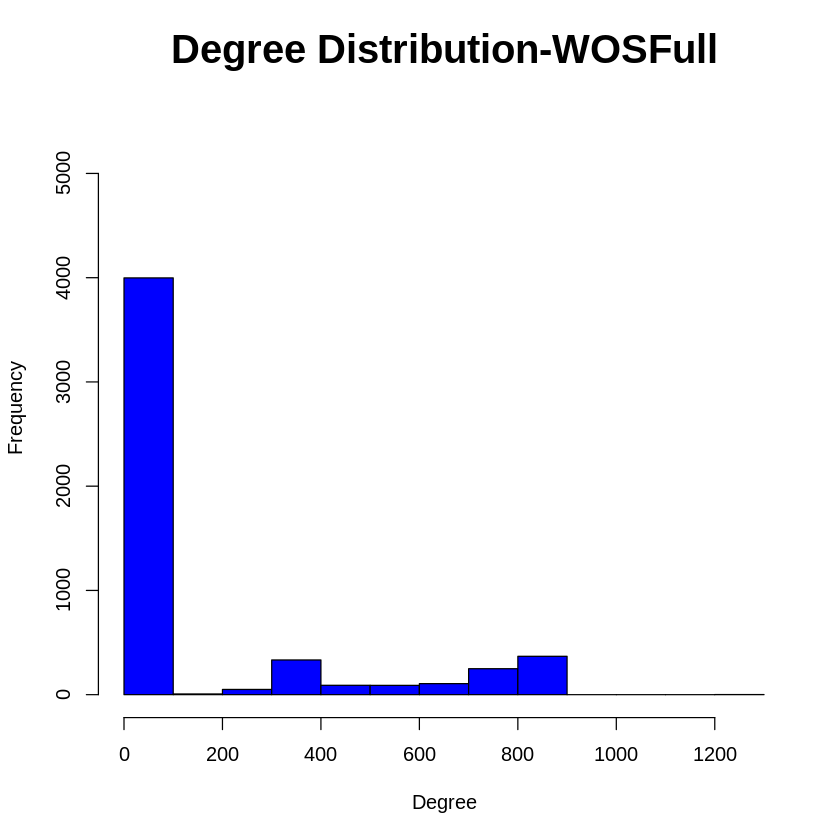

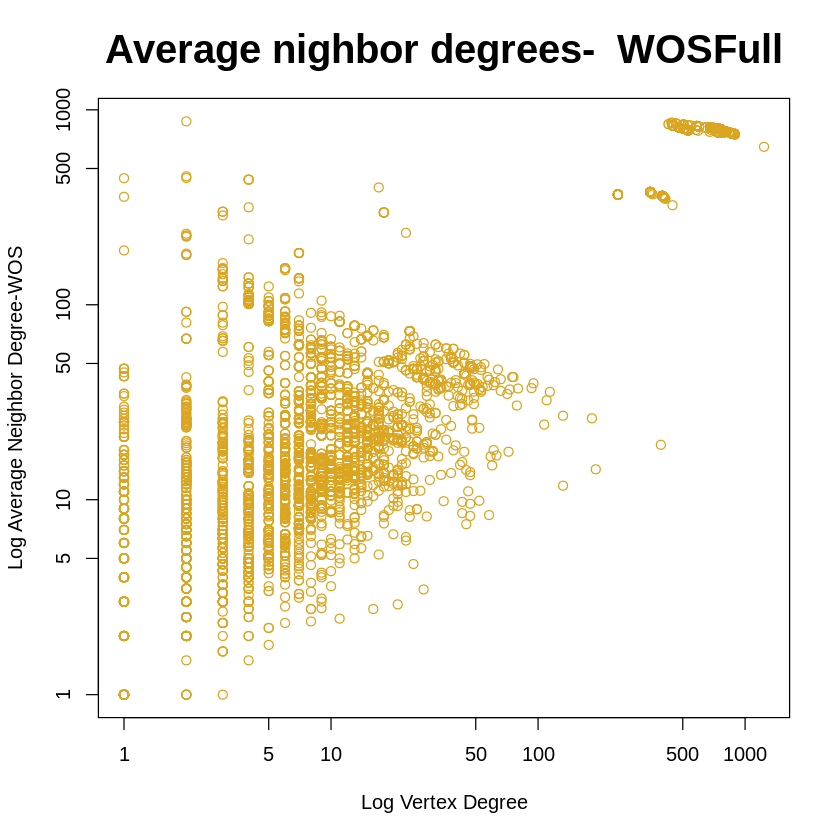

In [ ]:
#degree  Distribution
d1 <- degree(WOS_NET,gmode="graph")
hist(d1,col="blue",
         xlab="Degree", ylab="Frequency",
         main="Degree Distribution-WOSFull", ylim=c(0, 5500),cex.main=2)

#Interpretation: While there is a substantial number 
#of nodes of quite low degree, there are also a trivial
#number of nodes with higher order of degree magnitudes.
#, a plot of average neighbor degree versus vertex degree
a.nn.deg <- graph.knn(WOS_graph,V(WOS_graph))$knn
plot(d1, a.nn.deg, log="xy",
col="goldenrod", xlab=c("Log Vertex Degree"),
ylab=c("Log Average Neighbor Degree-WOS"))
title(main="Average nighbor degrees-  WOSFull", cex.main=2)

#Interpretation: The plot "Log Average Neighbor Degree" suggests that while there
# is a tendency of nodes of higher degrees to link with similar nodes,
# nodes of lower degree tend to link with nodes of both lower and higher degrees.

In [ ]:
#The degree() function calculates and returns the degree centrality scores
#for each node. The gmode option tells the function to treat the network object as a
#non-directed network (graph)
#Degree Centrality
table(sort(degree(WOS_NET,gmode="graph"),decreasing = TRUE))
max(degree(WOS_NET,gmode="graph"))

#Closeness Centrality
closeness(WOS_NET,gmode="graph")
table(sort(eigen <- evcent(WOS_NET)))

#
table(sort(betweenness(WOS_NET,gmode="graph")))

#df.prom2 <- data.frame(
#degree = sort(degree(WOS_NET),decreasing = TRUE),
#betweenness = sort(betweenness(WOS_NET),decreasing = TRUE),
#eigen <- sort(evcent(WOS_NET))

#)
#df.prom2 

In [ ]:
#Degree Centrality 
str(degree(WOS_NET))
summary(degree(WOS_NET,gmode="graph"))

 num [1:5291] 14 20 20 44 12 30 36 8 18 22 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     5.0    10.0   161.5    52.0  1234.0 

In [ ]:
#correlations among a set of centrality measures
df.prom <- data.frame(
deg = degree(WOS_NET,gmode="graph"),
btw = betweenness(WOS_NET,gmode="graph")
)

cor(df.prom)

In [ ]:
# Centralization: Network Level Indices of Centrality
centralization(WOS_NET,degree, mode= "graph") *100
#centralization(WOS_NET,betweenness,  mode= "graph")*100



[1] 20.28184

In [ ]:
#Subgroups
#clique.number() does not return the number of cliques, but the size of the largest clique
numclq<-clique.number(WOS_graph)
numclq
#maximal.cliques(PRIN_graph,min=10)
lrgclq<-largest.cliques(WOS_graph)
lrgclq

#italian resercher :
#there are 469 nodes (cliques
#of size one) and 399 edges (cliques of size two), followed by 129 triangles (cliques
#of size three).
table(sapply(cliques(ll), length))

#cliques(PRIN_graph)

[1] 679

[[1]]
+ 679/5291 vertices, named, from 8ccd882:
  [1] AW1690 A2139  A2273  AC046  AC053  AW0006 AW0007 AW0022 AW0038 AW0051
 [11] AW0069 AW0084 AW0108 AW0109 AW0116 AW0130 AW0139 AW0140 AW0149 AW0181
 [21] AW0214 AW0215 AW0220 AW0222 AW0229 AW0311 AW0314 AW0334 AW0357 AW0358
 [31] AW0362 AW0376 AW0409 AW0416 AW0432 AW0434 AW0445 AW0451 AW0453 AW0473
 [41] AW0478 AW0481 AW0493 AW0501 AW0540 AW0557 AW0558 AW0567 AW0599 AW0647
 [51] AW0692 AW0706 AW0708 AW0713 AW0715 AW0716 AW0741 AW0768 AW0780 AW0811
 [61] AW0815 AW0876 AW0916 AW0930 AW0947 AW0981 AW0985 AW1019 AW1021 AW1022
 [71] AW1031 AW1084 AW1104 AW1111 AW1118 AW1124 AW1133 AW1154 AW1159 AW1163
 [81] AW1181 AW1190 AW1213 AW1259 AW1304 AW1327 AW1331 AW1333 AW1335 AW1337
 [91] AW1349 AW1387 AW1437 AW1439 AW1440 AW1454 AW1488 AW1490 AW1492 AW1498
+ ... omitted several vertices



  1   2   3   4   5   6   7 
469 399 129  41  21   7   1 

Warning message in subgraph(WOS_graph, lc[[1]]):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”


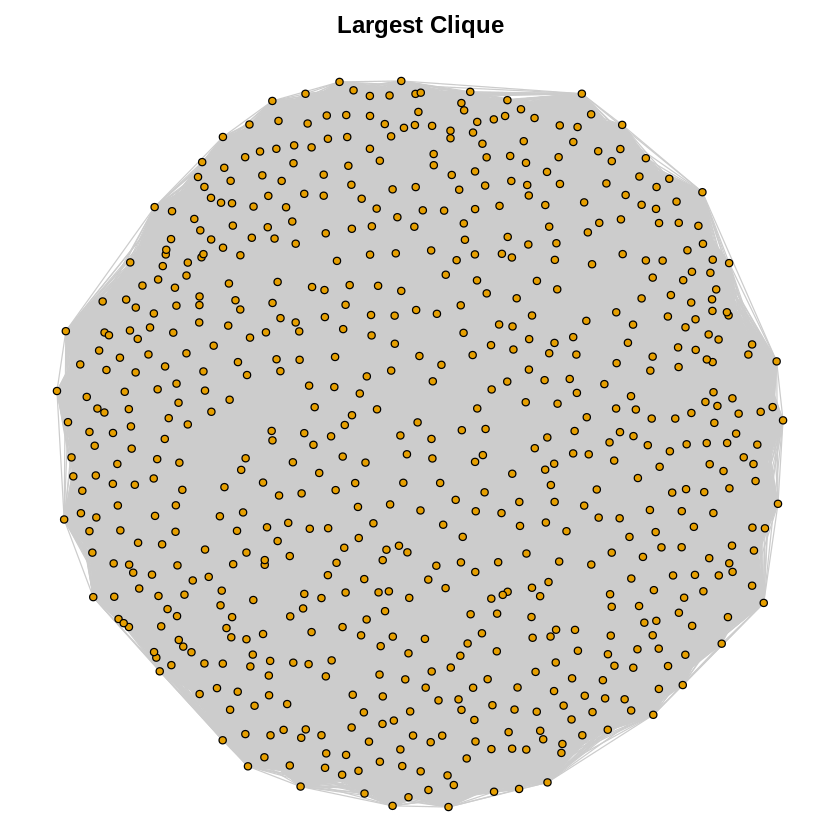

In [ ]:
#vidulizing the largest clique.
# Assign largest cliques output to object 'lc'
lc <- largest_cliques(WOS_graph)

# Create two new undirected subgraphs, each containing only the vertices of each largest clique.
gs1 <- as.undirected(subgraph(WOS_graph, lc[[1]]))

# Plot the  largest cliques 
par(mar=c(0,0,2,0))

plot(gs1,
     vertex.label = NA, 
     vertex.size = 2,
     edge.color = 'gray80',
     main = "Largest Clique",

)


In [ ]:
#A k-core is a maximal subgraph where each vertex is
# connected to at least k other
#vertices in the subgraph. 
#It returns a vector listing the highest core 
#that each vertex belongs to in the network.
#The results tell us the k-cores range from 1 to 5 for italian Authors. 
coreness <- graph.coreness(ll)
table(coreness)
maxCoreness <- max(coreness) # THE NUMBER OF CORNESS IN GRAPH THAT IN THOS CASE IS 5
maxCoreness
f<- as.vector(unique(coreness))
f


coreness
  0   1   2   3   6 
141 146 149  26   7 

[1] 6

[1] 3 1 2 0 6

In [ ]:
#it shows us the nodes in k core
cores = graph.coreness(as.undirected(WOS_graph))
head(sort(cores, decreasing=TRUE), 10)

A0717  A2139  A2273  AC046  AC053 AW0006 AW0007 AW0017 AW0022 AW0038 
   678    678    678    678    678    678    678    678    678    678

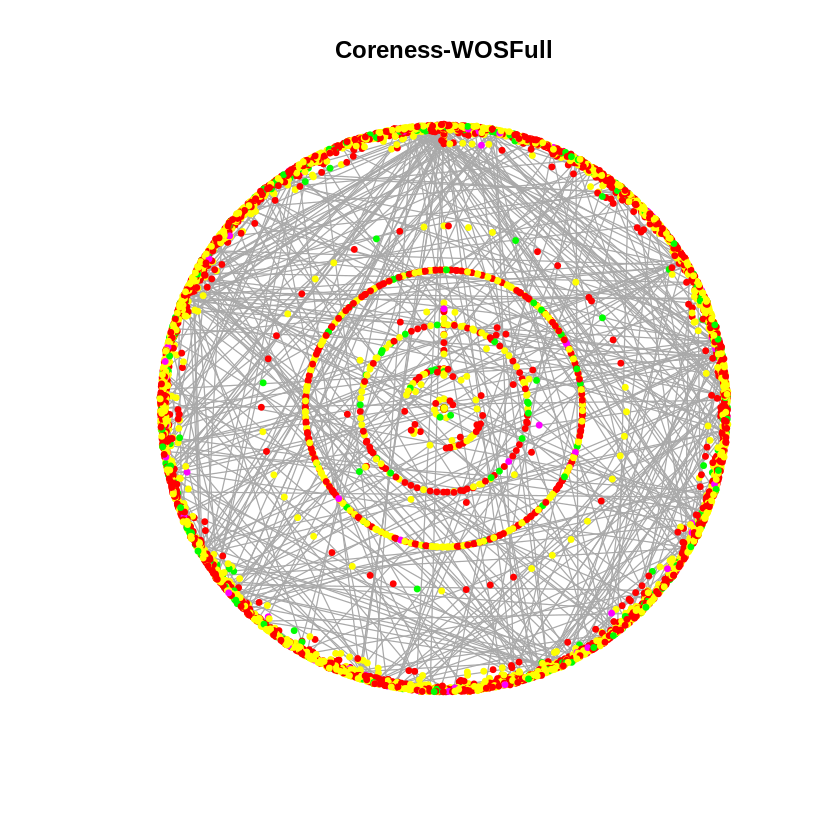

In [ ]:
#Creat layout
CorenessLayout <- function(g) {
coreness <- graph.coreness(g);
xy <- array(NA, dim=c(length(coreness), 2));
 
shells <- sort(unique(coreness));
for(shell in shells) {
v <- 1 - ((shell-1) / max(shells));
nodes_in_shell <- sum(coreness==shell);
angles <- seq(0,360,(360/nodes_in_shell));
angles <- angles[-length(angles)]; # remove last element
xy[coreness==shell, 1] <- sin(angles) * v;
xy[coreness==shell, 2] <- cos(angles) * v;
}
return(xy);
}

 
# g is the network
# compute coreness
coreness <- graph.coreness(ll);
# assign colors
colbar <- rainbow(max(coreness));
# create layout
lay <- CorenessLayout(WOS_graph);
# plot
plot(ll,vertex.label=NA
, layout=lay, vertex.size=2,
 vertex.color=colbar[coreness],
vertex.frame.color=colbar[coreness], main='Coreness-WOSFull');
#This figure shows that the not center of the network is made up of the
#highest k-core. In this case, the 5-core is comprised  of the total nodes.



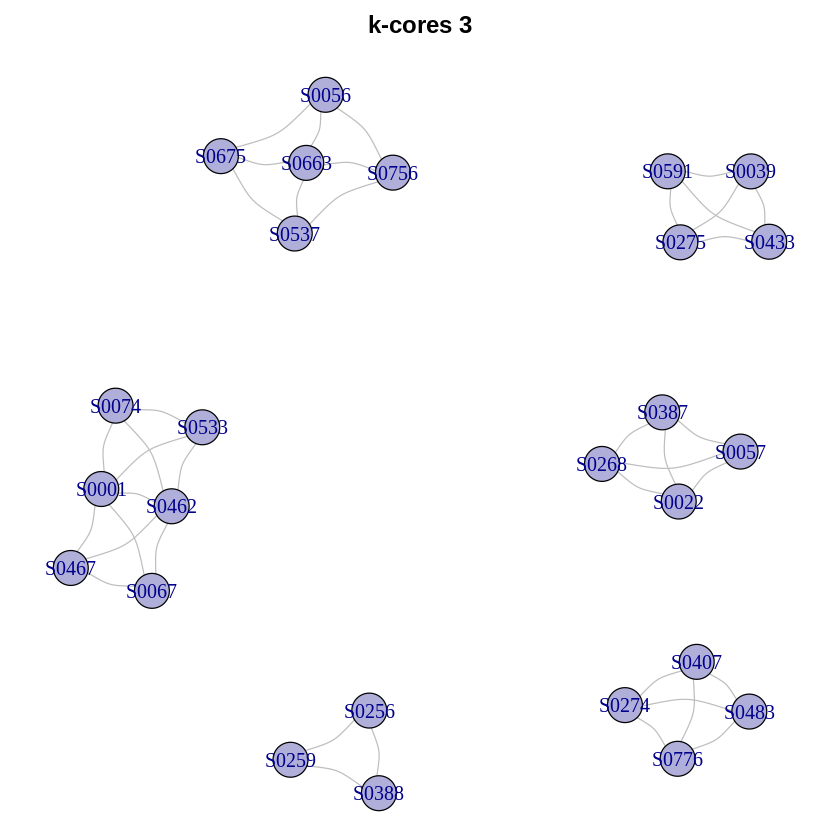

In [ ]:
#lets plot coreness 3
coreness <- graph.coreness(ll)
#V(PRIN_graph)$name <- coreness
par(mar=c(0,0,2,0))

iD <- ll
iD <- induced.subgraph(ll,vids=which(coreness==3))

plot(iD,main="k-cores 3",vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
vertex.size=10,edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3)

[1] "BERNI R"       "BLANGIARDO GC" "CRIPPA F"      "MILIOLI MA"   
[5] "PALMITESTA P"  "PEZZULLI S"    "PACINI B"

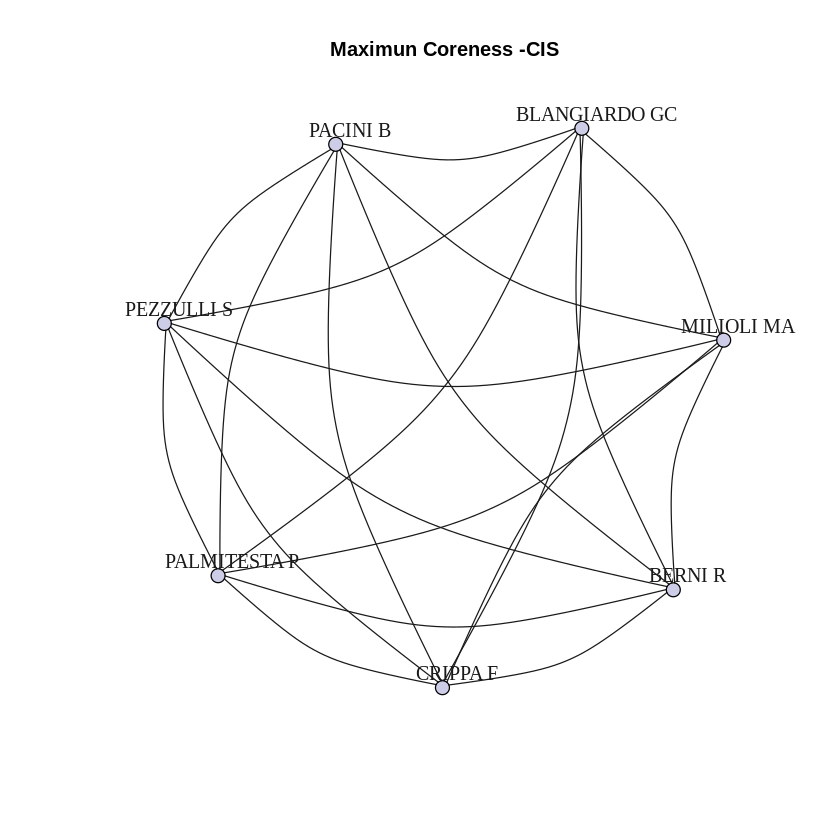

In [ ]:
#To find the authors with maximum coreness.
kcores <- coreness(ll)
verticesHavingMaxCoreness <- which(kcores == max(kcores)) 
V(ll)$Author[verticesHavingMaxCoreness]
#To plot authors with maximum core. 
# Add edge attribute id values
E(ll)$id <- seq(ecount(ll))
# Extract subgraph
MaxCorenessPlot <- induced.subgraph(graph=ll,vids=verticesHavingMaxCoreness)
#Plot subgraph
plot(MaxCorenessPlot,vertex.color=rgb(0,0,139,alpha=50,maxColorValue=255),
vertex.size=5,edge.color="gray10", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,
vertex.label.dist=1,
     pad=0.9,
     edge.arrow.size=.1,
     vertex.label.color ="gray10",
     vertex.label.cex=1,
     vertex.label=V(ll)$Author[verticesHavingMaxCoreness])
title(main="Maximun Coreness -CIS", cex.main=1)

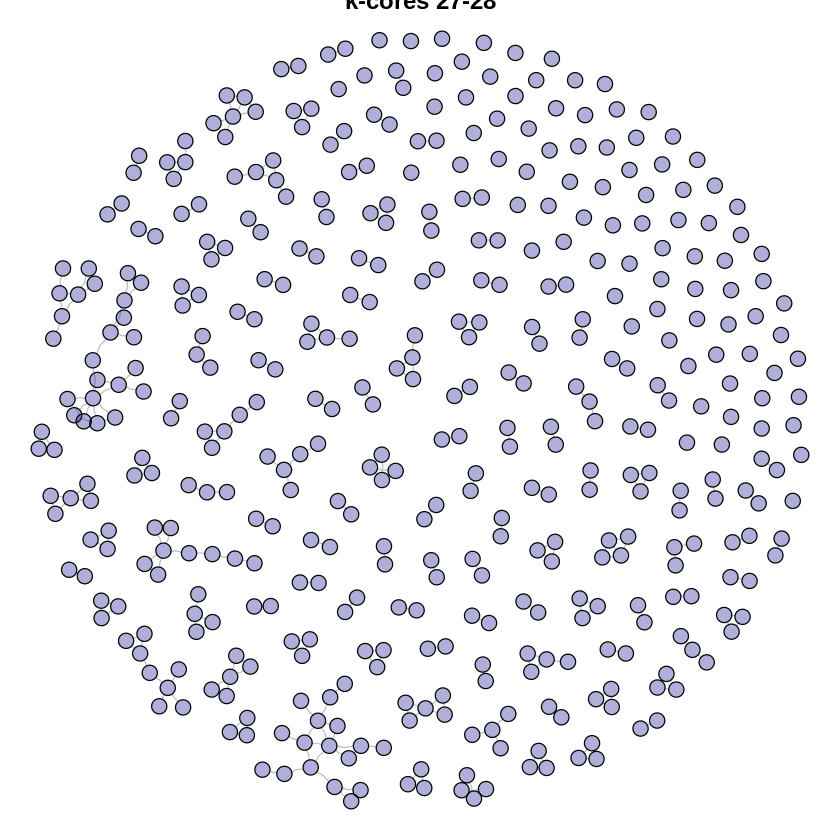

In [ ]:
#vidualizing when coreness is equall to 2
coreness <- graph.coreness(WOS_graph)
#V(PRIN_graph)$name <- coreness
par(mar=c(0,0,0,0))

iD <- WOS_graph
iD <- induced.subgraph(WOS_graph,vids=which(coreness==2))

plot(iD,main="k-cores 27-28",vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
vertex.size=4,edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,
vertex.label=NA)

In [ ]:
COM <- decompose.graph(WOS_graph)
#The graph has 103  total component and
#A census of all connected components within this graph, however, shows that there
#clearly is a giant componentwith 4852 vertices, 
#This  component contains more than 90% of the vertices in the network.
table(sapply(COM, vcount))

COM.gc <- decompose.graph(WOS_graph)[[1]]
#e average path length in the giant component is barely greater than 5
average.path.length(COM.gc)[[1]]
#n the longest of paths
diameter(COM.gc)
#In the case of the giant component of the  network, the vertex and edge
#connectivity are both equal to one.
#Thus it requires the removal of only a single well-chosen vertex or edge in order to
#break this subgraph into additional components.
vertex.connectivity(COM.gc)
edge.connectivity(COM.gc)
#In the giant component of the data network,
#almost 10% of the vertices are cut vertices.(234) out of all nodes
P.cut.vertices <- articulation.points(COM.gc)
length(P.cut.vertices)


   1    2    3    4    5    6    7    8    9   10   11   12   13   27   30   32 
  26   23   18    7    8    3    2    2    2    3    1    3    1    1    1    1 
4852 
   1 

[1] 5.473027

[1] 16

[1] 1

[1] 1

[1] 234

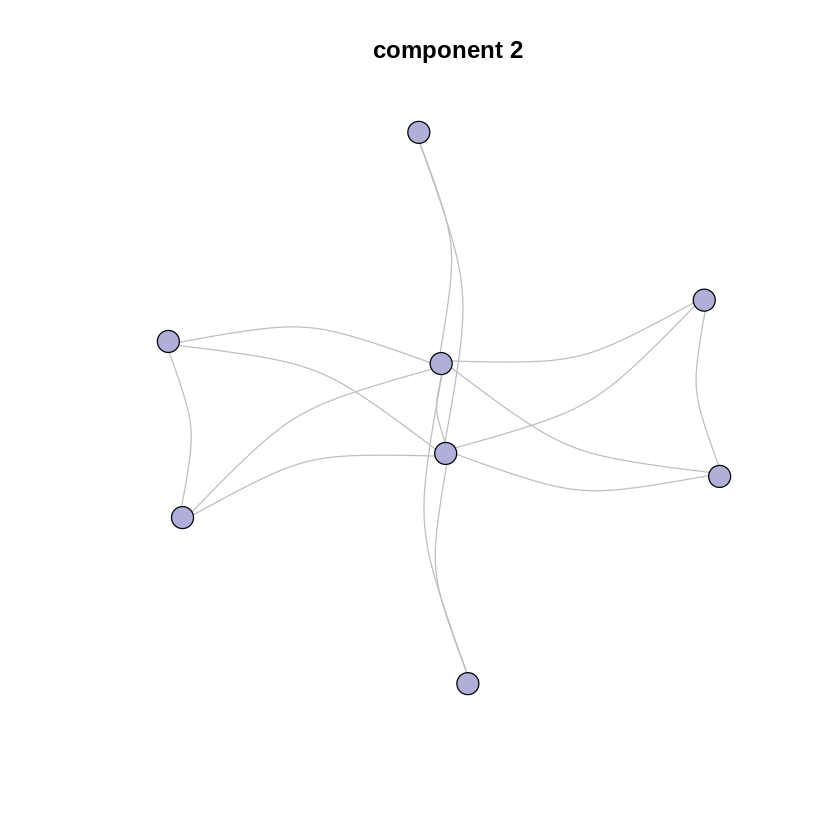

In [ ]:
#Vidualizing 2  component. # 2
par(mfrow=c(1,1))
plot(COM[[2]], vertex.size=8, vertex.label=NA,vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,main=" component 2")


In [ ]:
COM

[[1]]
IGRAPH 29b5807 UNW- 4852 426435 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), color (v/c), weight (e/n)
+ edges from 29b5807 (vertex names):
 [1] A0001--A0274  A0001--A0957  A0001--A1369  A0001--A1451  A0001--AW1426
 [6] A0001--S0577  A0001--S0662  A0002--A0217  A0002--A0965  A0002--A1229 
[11] A0002--A1653  A0002--A1805  A0002--A2104  A0002--A2108  A0002--S0071 
[16] A0002--S0319  A0002--S0479  A0004--A0069  A0004--A0305  A0004--A0394 
[21] A0004--A0587  A0004--A0630  A0004--A0642  A0004--A1285  A0004--A1489 
[26] A0004--A1641  A0004--S0314  A0005--A0462  A0005--A0714  A0005--A1341 
+ ... omitted several edges

[[2]]
IGRAPH 4952cdc UNW- 8 15 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), color (v/c), weight (e/n)
+ edges from 4952cdc (vertex names):
 [1] A0175--A0439 A129

Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”
Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”


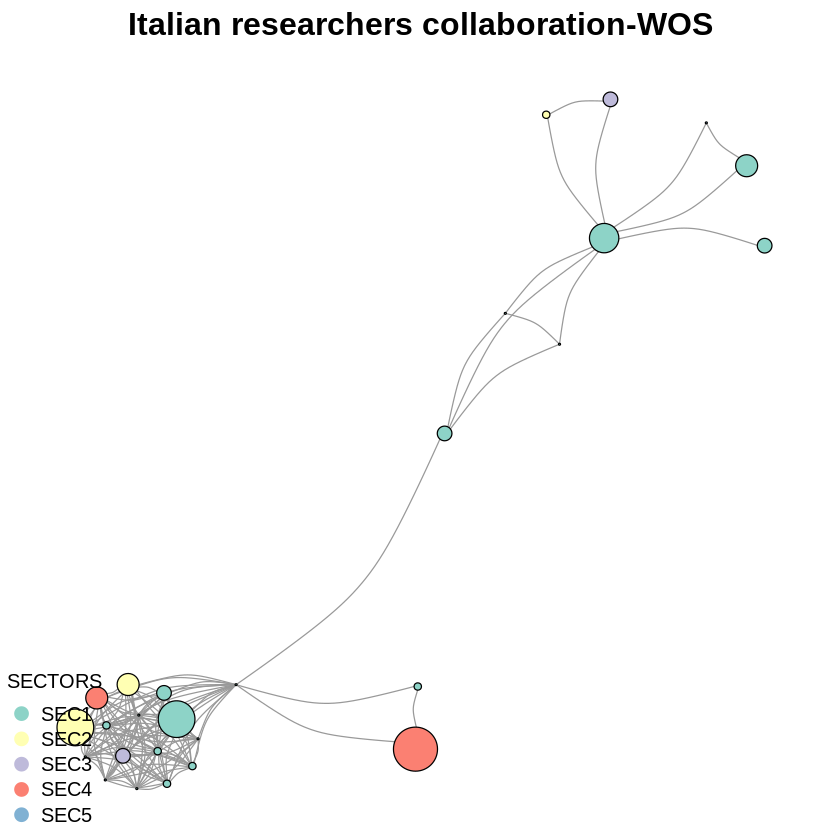

In [ ]:
#visualizing the component 4 
my_pal <- brewer.pal(11,"Set3")

par(mar=c(0,0,2,0))

deg <- degree(l,rescale=TRUE)
V(COM[[4]])$size <- deg*1700

rolecat <- as.factor(get.vertex.attribute(l,"Sector"))
V(COM[[4]])$color<- my_pal[rolecat]

plot(COM[[4]],edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers collaboration-WOS", cex.main=1.6)

legend("bottomleft",legend=c("SEC1","SEC2","SEC3","SEC4","SEC5"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="SECTORS")



The basic workflow for conducting community detection in igraph is to run
one of the community detection functions on a network and store the results in
a communities class object.
Then, the identified subgroups in the network can
be explored using a number of igraph functions that know how to operate with
communities objects. The networks can also be plotted easily to show the results
of the community detection.

In [ ]:
#From graph, I extract all clusters 

modules <- decompose.graph(WOS_graph)
out <- modules[order(sapply(modules, ecount), decreasing=T)]
length(out)
out
#min.vertices = 10


#a quick glance at plot reveals that this graph is not composed
# of a single connected component.
#total component is:103
#So 4852 of the nodes are in a single large component and the
# remaining  are in 102 small components. The 4852 nodes in
# the big component overwhelm the smaller components and the 102 
#small components acts as visual clutter for the big component.
# Let's separate the 26 small components.

[1] 103

[[1]]
IGRAPH 1af3170 UNW- 4852 426435 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), color (v/c), weight (e/n)
+ edges from 1af3170 (vertex names):
 [1] A0001--A0274  A0001--A0957  A0001--A1369  A0001--A1451  A0001--AW1426
 [6] A0001--S0577  A0001--S0662  A0002--A0217  A0002--A0965  A0002--A1229 
[11] A0002--A1653  A0002--A1805  A0002--A2104  A0002--A2108  A0002--S0071 
[16] A0002--S0319  A0002--S0479  A0004--A0069  A0004--A0305  A0004--A0394 
[21] A0004--A0587  A0004--A0630  A0004--A0642  A0004--A1285  A0004--A1489 
[26] A0004--A1641  A0004--S0314  A0005--A0462  A0005--A0714  A0005--A1341 
+ ... omitted several edges

[[2]]
IGRAPH ce71fac UNW- 27 137 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), color (v/c), weight (e/n)
+ edges from ce71fac (vertex names):
 [1] A0082 --A1866  

In [ ]:
install.packages("rainbow")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pcaPP’, ‘hdrcde’, ‘ks’




In [ ]:
library("rainbow")

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: pcaPP



In [ ]:
head(modules)[1:3]

[[1]]
IGRAPH cf85cd3 UNW- 4852 426435 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)
+ edges from cf85cd3 (vertex names):
 [1] A0001--A0274  A0001--A0957  A0001--A1369  A0001--A1451  A0001--AW1426
 [6] A0001--S0577  A0001--S0662  A0002--A0217  A0002--A0965  A0002--A1229 
[11] A0002--A1653  A0002--A1805  A0002--A2104  A0002--A2108  A0002--S0071 
[16] A0002--S0319  A0002--S0479  A0004--A0069  A0004--A0305  A0004--A0394 
[21] A0004--A0587  A0004--A0630  A0004--A0642  A0004--A1285  A0004--A1489 
[26] A0004--A1641  A0004--S0314  A0005--A0462  A0005--A0714  A0005--A1341 
+ ... omitted several edges

[[2]]
IGRAPH 14a0eab UNW- 8 15 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)
+ edges from 14a0eab (vertex names):
 [1] A0175--A0439 A1291--A1907 A0017--A2062 A0175--A2062 A0202--A2062
 [

In [ ]:
vertexes <- character()
data_frames <- list()
for(i in 2:length(out)) {
  vertexes[i] <- list(vertex.attributes(out[[i]])$name)
  data_frames[[i]] <- get.data.frame(out[[i]])
}
sub_nodes = unlist(vertexes)
subv <- sub_nodes
g3 <- induced.subgraph(graph=WOS_graph,vids=subv)
g4<-asNetwork(g3)
rescale <- function(nchar,low,high) {
min_d <- min(nchar)
max_d <- max(nchar)
rscl <- ((high-low)*(nchar-min_d))/(max_d-min_d)+low
rscl
}



In [ ]:
#I can calculate the betweenness of this  graph and display the outcome:
wc <- edge.betweenness.community(g3, weights = NULL
                                 ,directed = FALSE,bridges = TRUE)
#This splits up each sub cluster as a community.



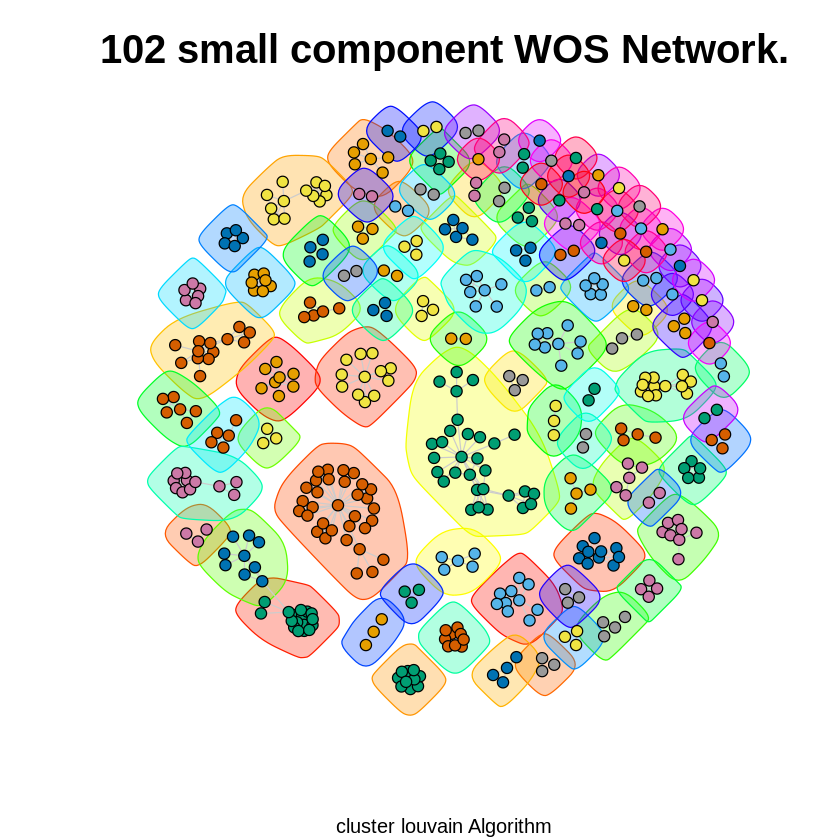

In [ ]:
## Let's separate the 103 small components.
plot(wc, g3, vertex.size=4,
edge.color="gray80",
     vertex.label=NA)

         title(main="102 small component WOS Network.",sub="cluster louvain Algorithm", cex.main=2)


In [ ]:
vertexes <- character()
data_frames <- list()
for(i in 1:1) {
  vertexes[i] <- list(vertex.attributes(out[[i]])$name)
  data_frames[[i]] <- get.data.frame(out[[i]])
}
sub_nodes = unlist(vertexes)
subv <- sub_nodes
LargeComp <- induced.subgraph(graph=WOS_graph,vids=subv)
g6<-asNetwork(LargeComp)
rescale <- function(nchar,low,high) {
min_d <- min(nchar)
max_d <- max(nchar)
rscl <- ((high-low)*(nchar-min_d))/(max_d-min_d)+low
rscl
}


[1] 23

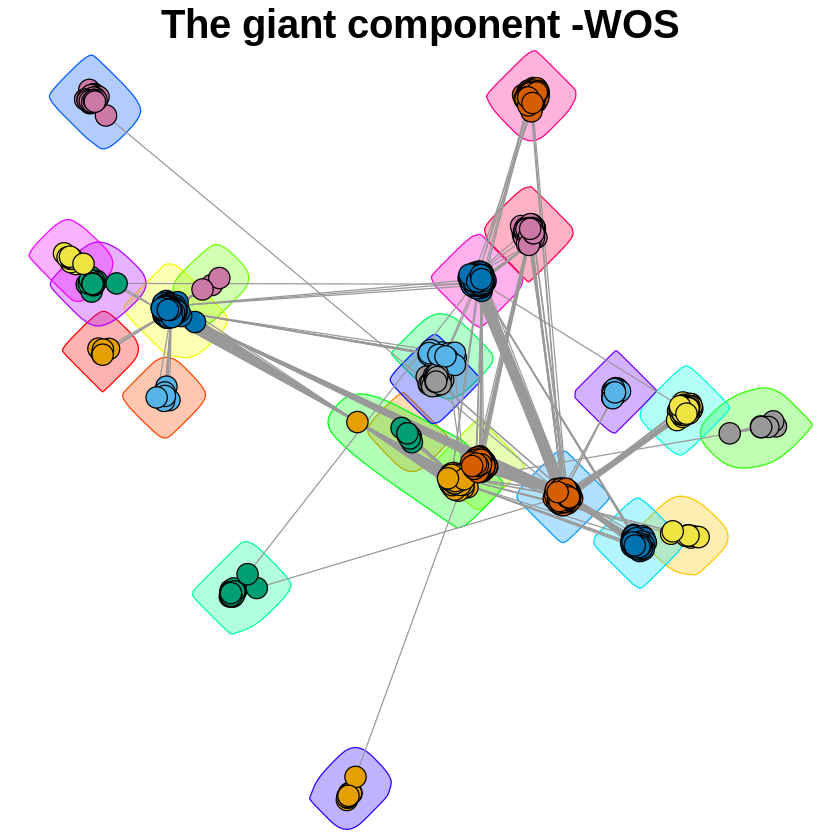

In [ ]:
LC.gn.comm <- cluster_louvain(LargeComp)
max(LC.gn.comm$membership)


#we can position vertices in the same community group together and 
#make different communities stay further apart.
LC_Grouped = LargeComp
E(LC_Grouped)$weight = 1
for(i in unique(membership(LC.gn.comm))) {
    GroupV = which(membership(LC.gn.comm) == i)
    LC_Grouped = add_edges(LC_Grouped, combn(GroupV, 2), attr=list(weight=6))
} 

set.seed(1234)
LO = layout_with_fr(LC_Grouped)
colors <- rainbow(max(membership(LC.gn.comm)))
par(mar=c(0,0,2,0))
plot(LC.gn.comm, LargeComp, layout=LO,
    vertex.size = 6, 
    vertex.color=colors[membership(LC.gn.comm)], 
    vertex.label = NA, edge.width = 1,edge.color="gray60")
             title(main="The giant component -WOS",sub="cluster louvain Algorithm", cex.main=2)


In [ ]:
LC.gn.comm

IGRAPH clustering multi level, groups: 23, mod: 0.36
+ groups:
  $`1`
  [1] "A0502" "A0722" "A0938" "A1566" "S0682"
  
  $`2`
  [1] "AC270"  "AC396"  "AC434"  "AC438"  "AW1818" "S0295"  "S0581" 
  
  $`3`
  [1] "AC016" "AC246" "AC252" "AC268" "AC479" "AC485" "S0508"
  
  $`4`
  + ... omitted several groups/vertices

In [ ]:
unique(LC.gn.comm$membership)
table(LC.gn.comm$membership)

[1] 23 14 21 12  6 18 17 13 16 10 22 11  9 19 15  1  5  8  4 20  3  2  7


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   5    7    7   12  887  416    3    7  421   41   27  102  132 1504   70   60 
  17   18   19   20   21   22   23 
  15   32   42   12  703  136  211 

In [ ]:
#Attach community labels as vertex attribute
V(WOS_graph)$L.cluster <- membership(LC.gn.comm)
V(WOS_graph)$Author[V(WOS_graph)$L.cluster==14]
#The 14th community has the maximum density over the dataset
sapply(unique(membership(LC.gn.comm)), function(gg) {
  subg1<-induced.subgraph(WOS_graph, which(membership(LC.gn.comm)==gg)) #membership id differs for each cluster
  ecount(subg1)/ecount(WOS_graph)
})


Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”


[1] "External"          "External"          "External"         
   [4] "External"          "External"          "External"         
   [7] "External"          "External"          "External"         
  [10] "External"          "External"          "External"         
  [13] "External"          "External"          "External"         
  [16] "External"          "External"          "External"         
  [19] "External"          "External"          "External"         
  [22] "External"          "External"          "External"         
  [25] "External"          "External"          "External"         
  [28] "External"          "External"          "External"         
  [31] "External"          "External"          "External"         
  [34] "External"          "External"          "External"         
  [37] "External"          "External"          "External"         
  [40] "External"          "External"          "External"         
  [43] "External"          "External"          "External"         
  [46] "External"          "External"          "External"         
  [49] "External"          "External"          "External"         
  [52] "External"          "External"          "External"         
  [55] "External"          "External"          "External"         
  [58] "External"          "External"          "External"         
  [61] "External"          "External"          "External"         
  [64] "External"          "External"          "External"         
  [67] "External"          "External"          "External"         
  [70] "External"          "External"          "External"         
  [73] "External"          "External"          "External"         
  [76] "External"          "External"          "External"         
  [79] "External"          "External"          "External"         
  [82] "External"          "External"          "External"         
  [85] "External"          "External"          "External"         
  [88] "External"          "External"          "External"         
  [91] "External"          "External"          "External"         
  [94] "External"          "External"          "External"         
  [97] "External"          "External"          "External"         
 [100] "External"          "External"          "External"         
 [103] "External"          "External"          "External"         
 [106] "External"          "External"          "External"         
 [109] "External"          "External"          "External"         
 [112] "External"          "External"          "External"         
 [115] "External"          "External"          "External"         
 [118] "External"          "External"          "External"         
 [121] "External"          "External"          "External"         
 [124] "External"          "External"          "External"         
 [127] "External"          "External"          "External"         
 [130] "External"          "External"          "External"         
 [133] "External"          "External"          "External"         
 [136] "External"          "External"          "External"         
 [139] "External"          "External"          "External"         
 [142] "External"          "External"          "External"         
 [145] "External"          "External"          "External"         
 [148] "External"          "External"          "External"         
 [151] "External"          "External"          "External"         
 [154] "External"          "External"          "External"         
 [157] "External"          "External"          "External"         
 [160] "External"          "External"          "External"         
 [163] "External"          "External"          "External"         
 [166] "External"          "External"          "External"         
 [169] "External"          "External"          "External"         
 [172] "External"          "External"          "External"         
 [175] "External"          "External"          "External"         
 [178] "External"          "External"          "Ex

[1] 1.703968e-03 8.815929e-02 1.152987e-02 2.949176e-04 8.618147e-03
 [6] 4.681232e-05 0.000000e+00 9.900805e-04 1.310745e-04 1.872493e-05
[11] 5.734509e-04 4.681232e-06 8.868593e-03 2.808739e-05 1.872493e-04
[16] 0.000000e+00 5.286515e-02 0.000000e+00 2.340616e-06 2.340616e-06
[21] 0.000000e+00 0.000000e+00 0.000000e+00

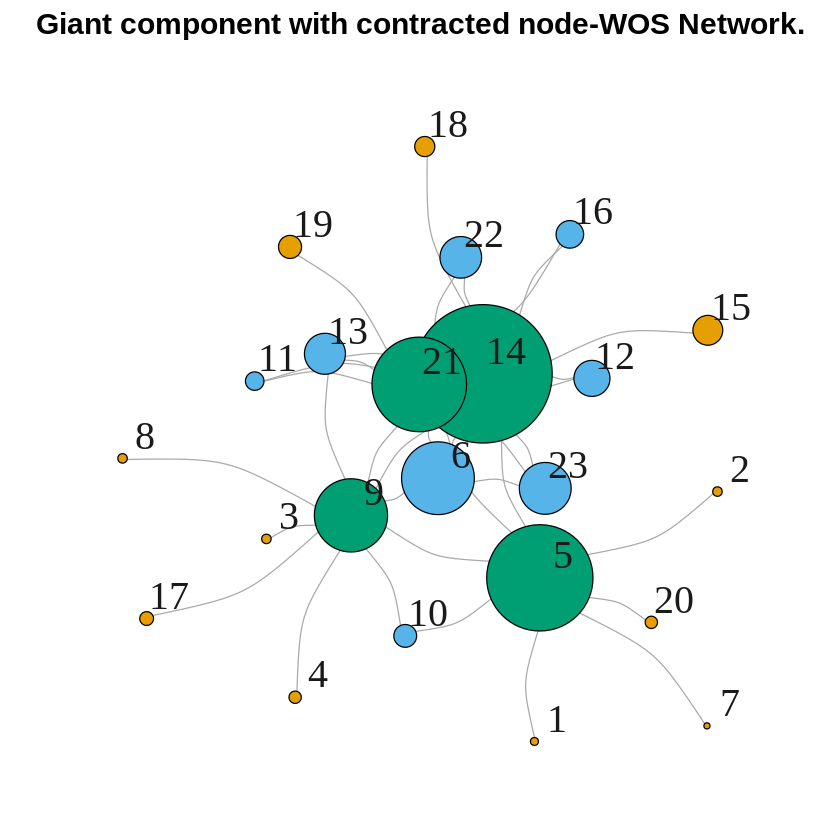

In [ ]:
#Contract the Communities

#Just plot a single node for each community. Here,
# I make the area of each community vertex proportional
# to the number of members of that community 
#I colored the vertices using a coarse grouping based on their degrees.
GN.Comm = simplify(contract(LargeComp, membership(LC.gn.comm)))
D<- unname(igraph::degree(GN.Comm))

set.seed(123)
par(mar=c(0,0,2,0))
plot(GN.Comm, vertex.size=sqrt(sizes(LC.gn.comm))*1.2,
    vertex.label=1:23, vertex.cex = 2,
   vertex.color=round(log(D))+1,
   layout=layout.lgl,  vertex.label.cex=2,edge.curved=0.3, 
   vertex.label.color ="gray10",vertex.label.dist=1.5
)
title(main="Giant component with contracted node-WOS Network.",sub="cluster louvain Algorithm", cex.main=1.5)


In [ ]:
#I run cluster_louvain of each subgraph by doing:
#Community Structure Detection Based On Edge Betweenness
#Many networks consist of modules which are densely connected 
#themselves but sparsely connected to other modules.

#Girvan-Newman produces 43 communities within this large component

betweenness_sub <- list()
for(i in 1:length(out)) {
  btws <-  cluster_louvain(out[[i]])
  print(btws)
  betweenness_sub[[i]] <- btws
}

IGRAPH clustering multi level, groups: 23, mod: 0.36
+ groups:
  $`1`
  [1] "A0502" "A0722" "A0938" "A1566" "S0682"
  
  $`2`
  [1] "AC270"  "AC396"  "AC434"  "AC438"  "AW1818" "S0295"  "S0581" 
  
  $`3`
  [1] "AC016" "AC246" "AC252" "AC268" "AC479" "AC485" "S0508"
  
  $`4`
  + ... omitted several groups/vertices
IGRAPH clustering multi level, groups: 3, mod: 0.19
+ groups:
  $`1`
  [1] "A0082" "A1866" "S0694"
  
  $`2`
   [1] "AW0351" "AW0421" "AW0511" "AW0799" "AW0935" "AW1205" "AW1272" "AW1546"
   [9] "AW1859" "AW2266" "AW2523" "AW2584" "AW2698" "AW3073" "AW3420"
  
  $`3`
  [1] "A2234"  "AC112"  "AC336"  "AW0849" "AW1922" "S0603"  "S0619"  "S0772" 
  [9] "S0774" 
  + ... omitted several groups/vertices
IGRAPH clustering multi level, groups: 6, mod: 0.47
+ groups:
  $`1`
  [1] "AW0725" "AW0726" "AW2322" "AW2420"
  
  $`2`
  [1] "AW0490" "AW0869" "AW2213" "AW3454"
  
  $`3`
  [1] "A0205"  "A1863"  "AW0338" "AW0638" "AW0820" "AW1224" "AW2345" "AW2564"
  [9] "S0709" 
  
  + ... omitt

In [ ]:
head(betweenness_sub)

[[1]]
IGRAPH clustering multi level, groups: 23, mod: 0.36
+ groups:
  $`1`
  [1] "A0502" "A0722" "A0938" "A1566" "S0682"
  
  $`2`
  [1] "AC270"  "AC396"  "AC434"  "AC438"  "AW1818" "S0295"  "S0581" 
  
  $`3`
  [1] "AC016" "AC246" "AC252" "AC268" "AC479" "AC485" "S0508"
  
  $`4`
  + ... omitted several groups/vertices

[[2]]
IGRAPH clustering multi level, groups: 3, mod: 0.19
+ groups:
  $`1`
  [1] "A0082" "A1866" "S0694"
  
  $`2`
   [1] "AW0351" "AW0421" "AW0511" "AW0799" "AW0935" "AW1205" "AW1272" "AW1546"
   [9] "AW1859" "AW2266" "AW2523" "AW2584" "AW2698" "AW3073" "AW3420"
  
  $`3`
  [1] "A2234"  "AC112"  "AC336"  "AW0849" "AW1922" "S0603"  "S0619"  "S0772" 
  [9] "S0774" 
  + ... omitted several groups/vertices

[[3]]
IGRAPH clustering multi level, groups: 6, mod: 0.47
+ groups:
  $`1`
  [1] "AW0725" "AW0726" "AW2322" "AW2420"
  
  $`2`
  [1] "AW0490" "AW0869" "AW2213" "AW3454"
  
  $`3`
  [1] "A0205"  "A1863"  "AW0338" "AW0638" "AW0820" "AW1224" "AW2345" "AW2564"
  [9] "S070

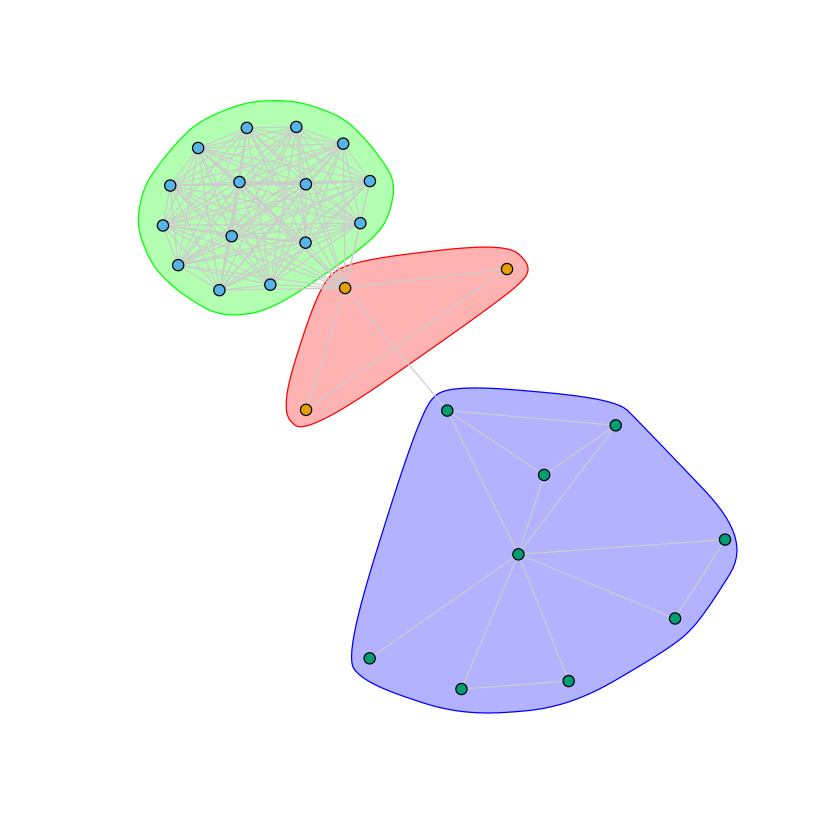

In [ ]:
#Whereas, if we consider the biggest cluster individually, we get:
#I can plot these individually by doing:
plot(betweenness_sub[[2]], out[[2]], vertex.size=4,
edge.color="gray80",vertex.label=NA, layout=layout.kamada.kawai)


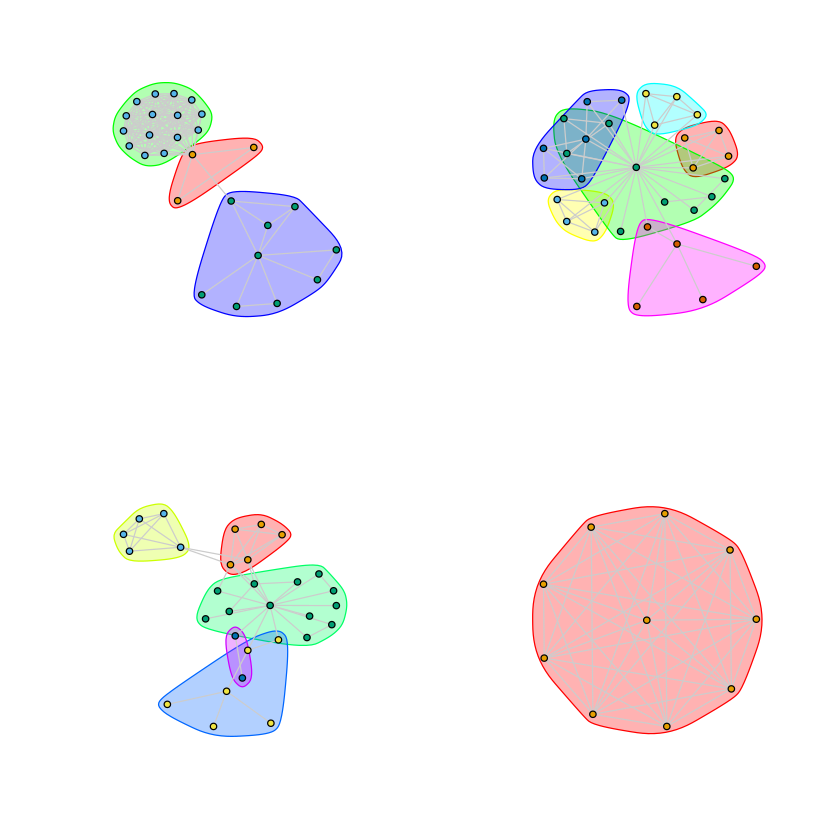

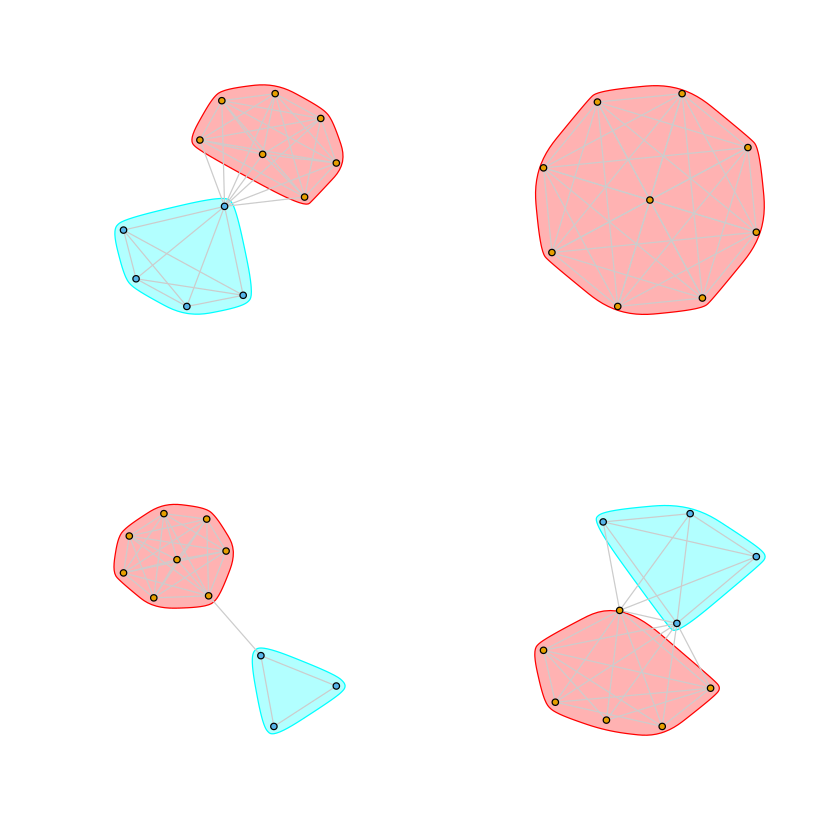

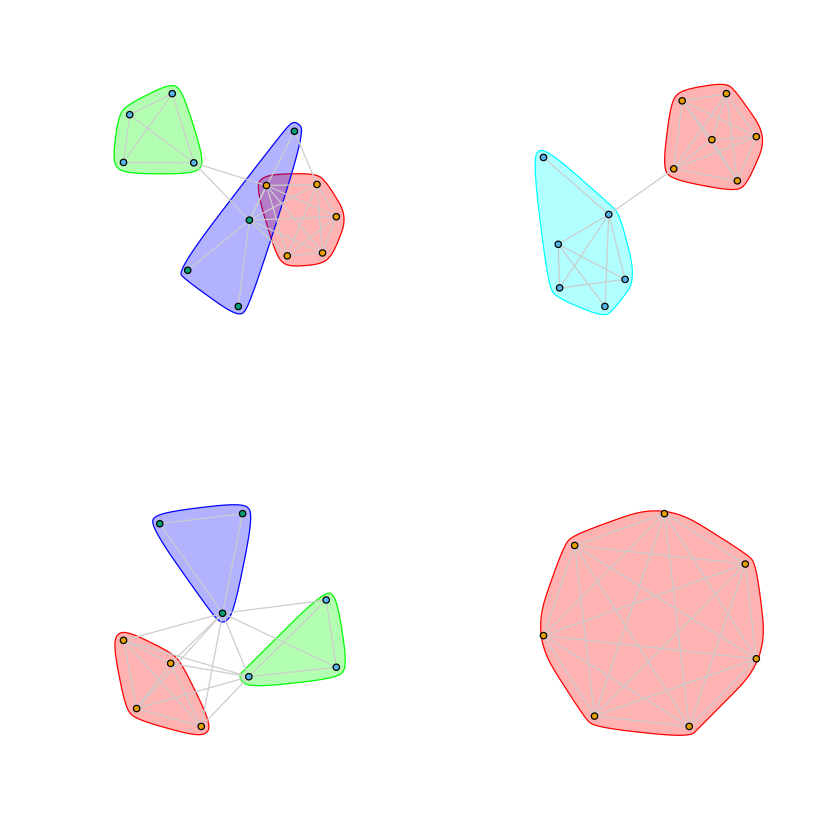

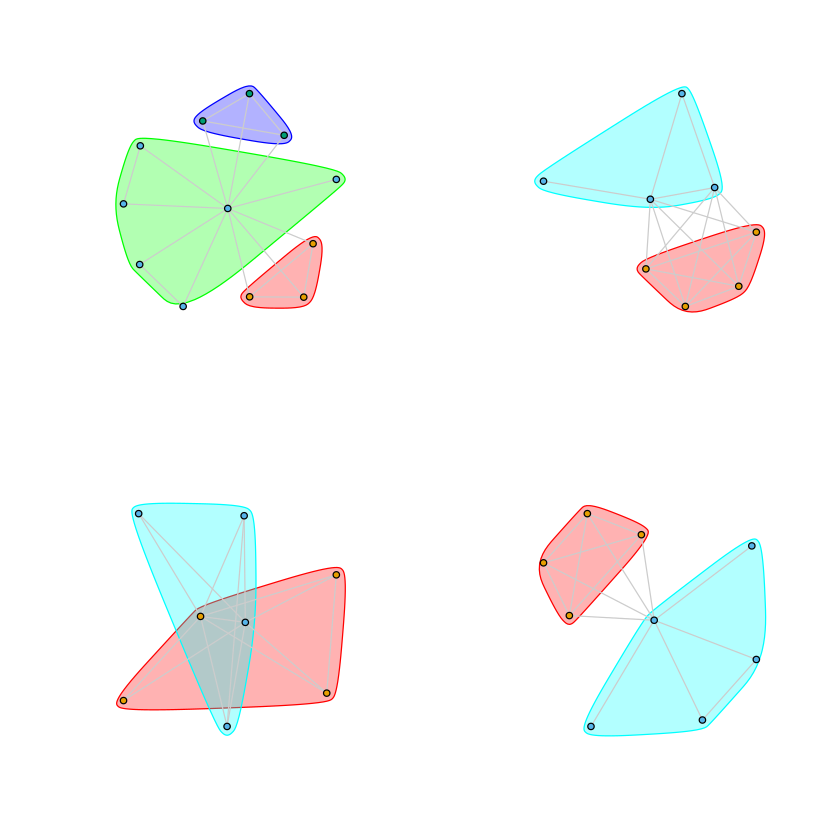

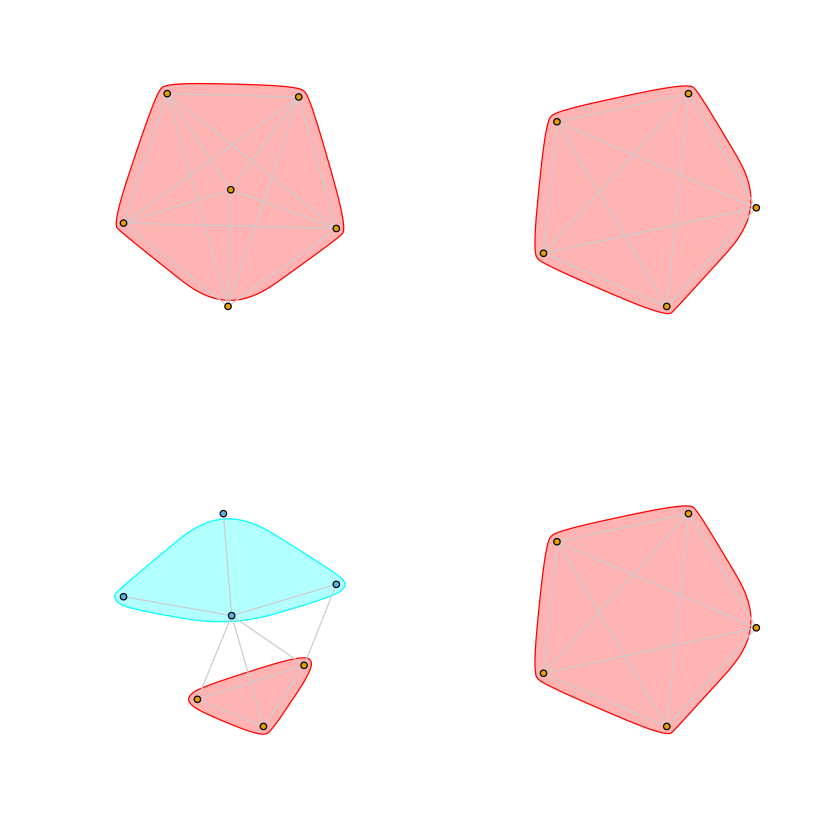

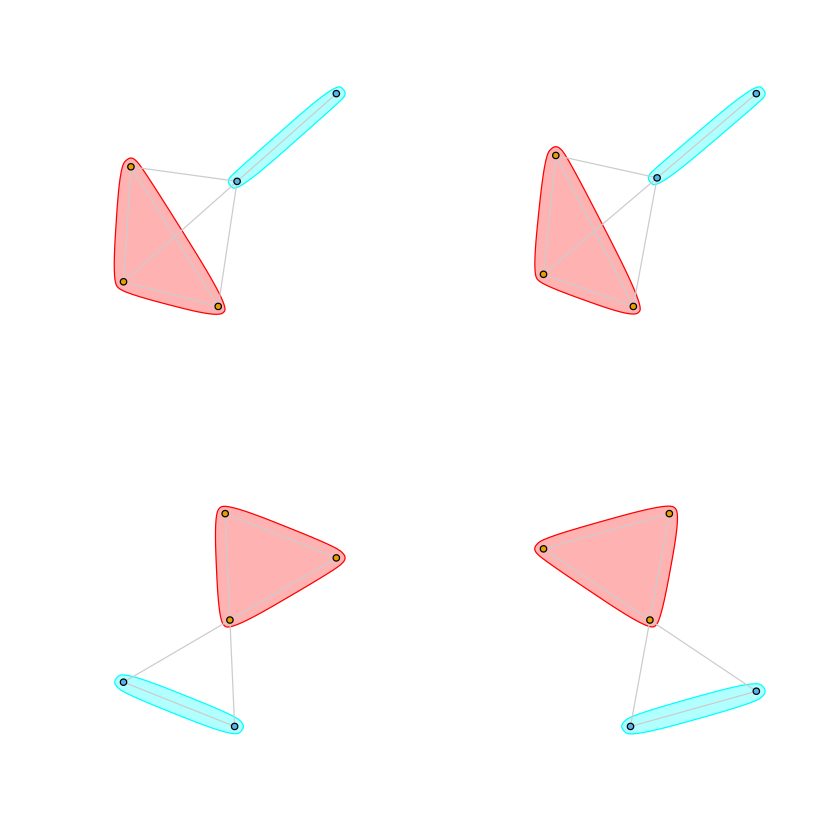

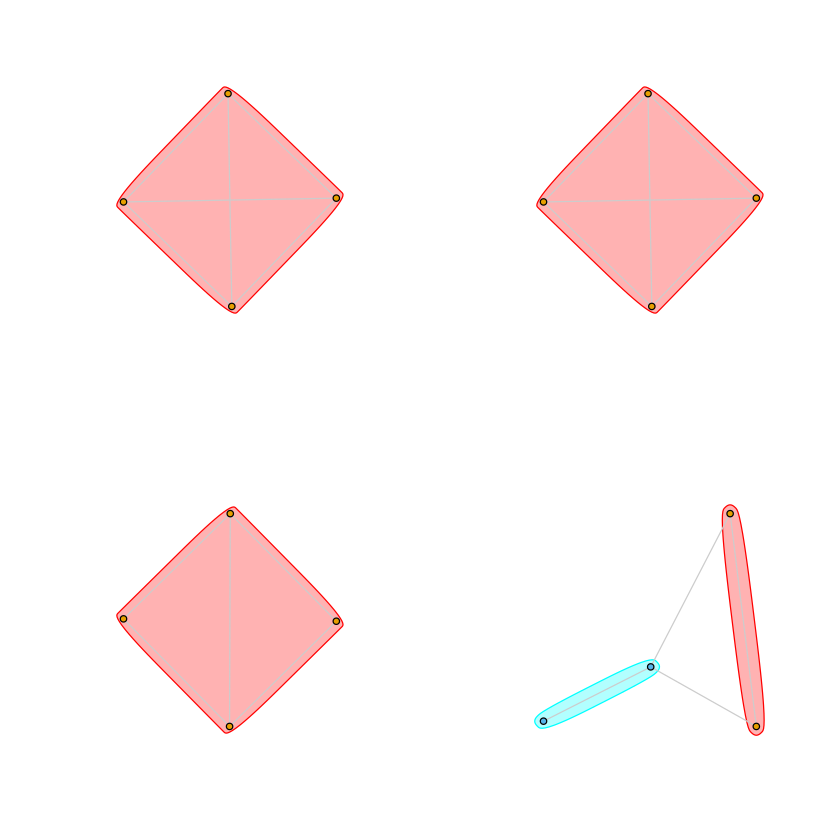

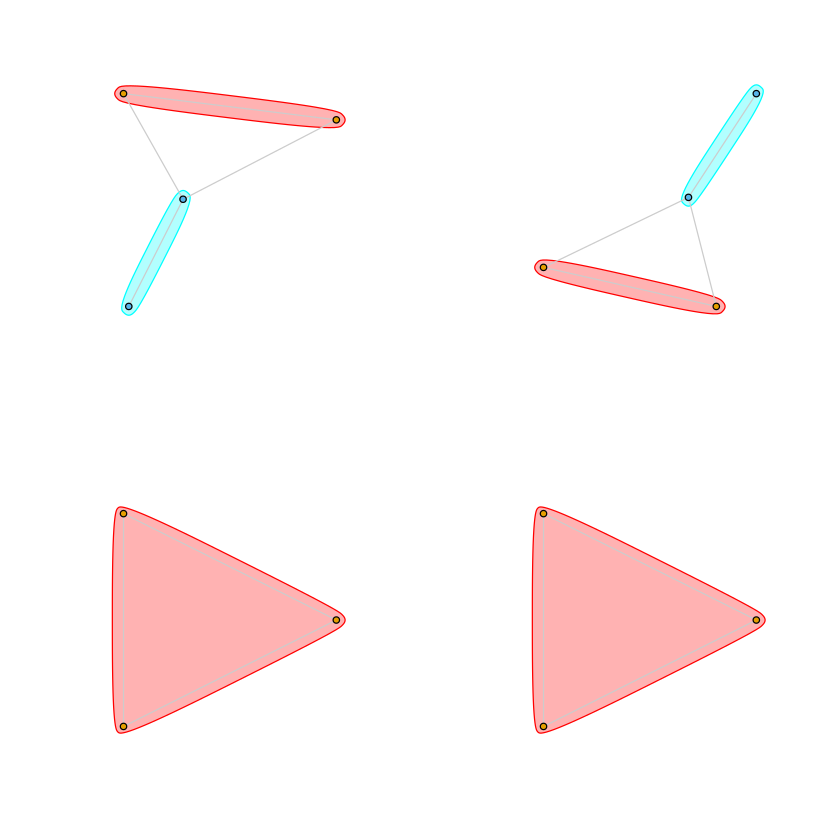

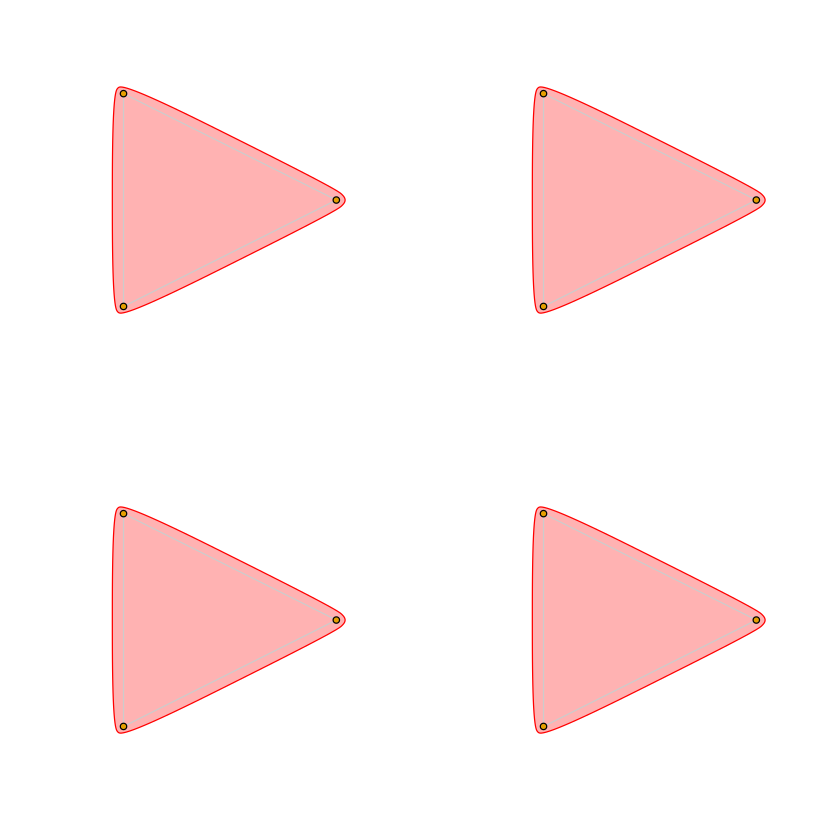

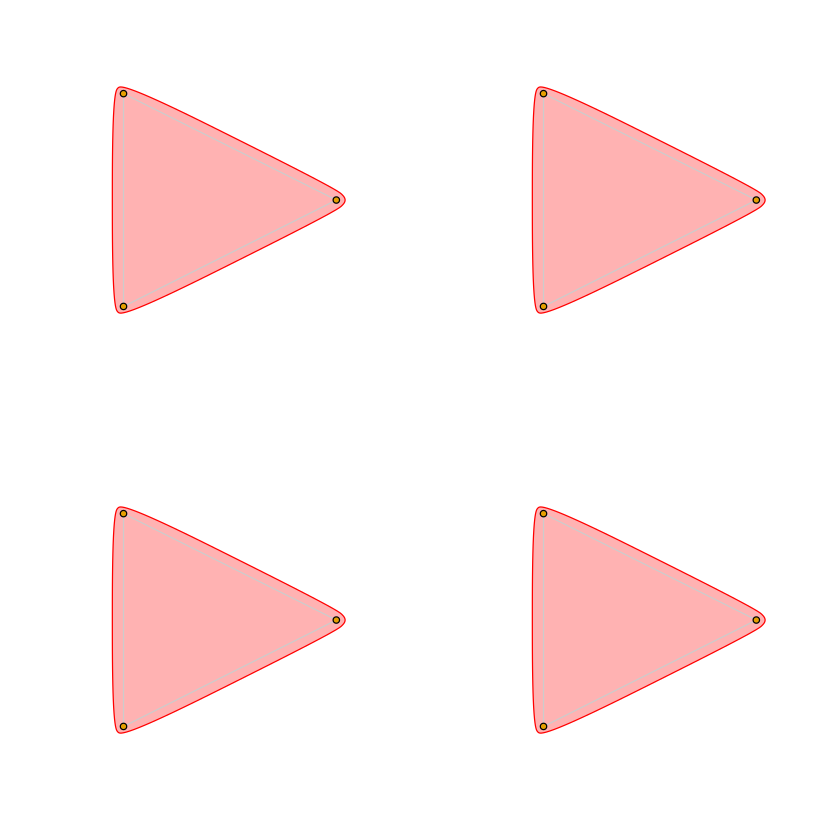

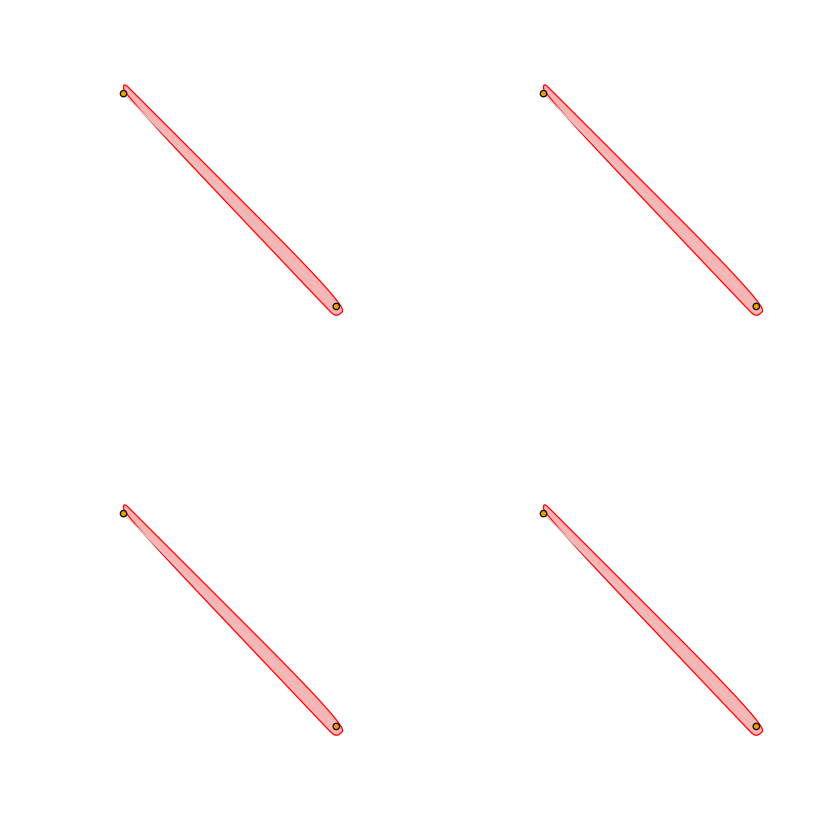

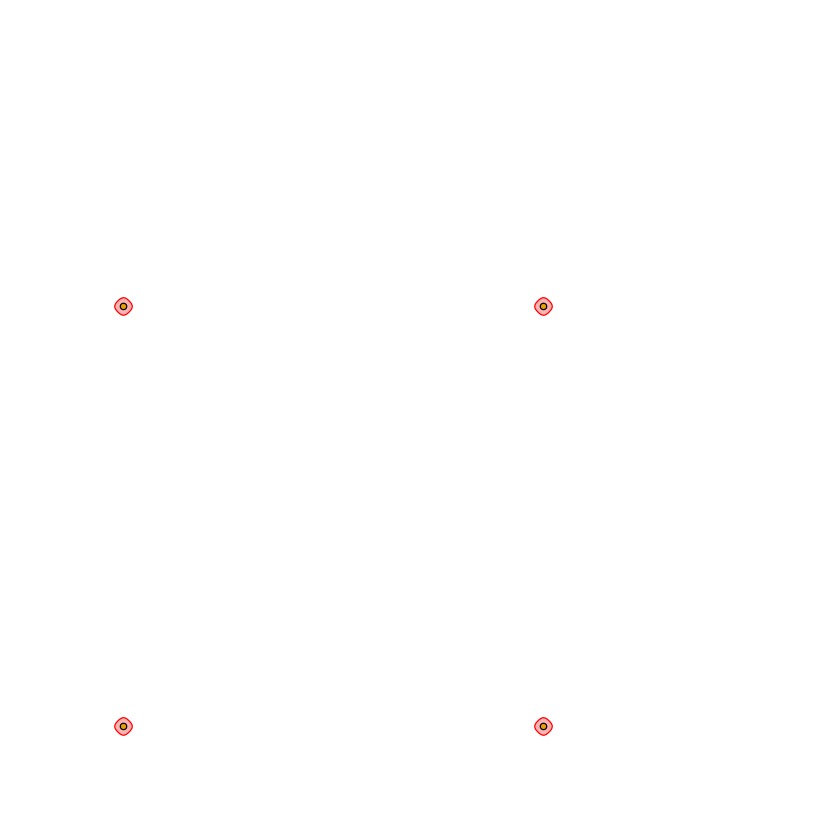

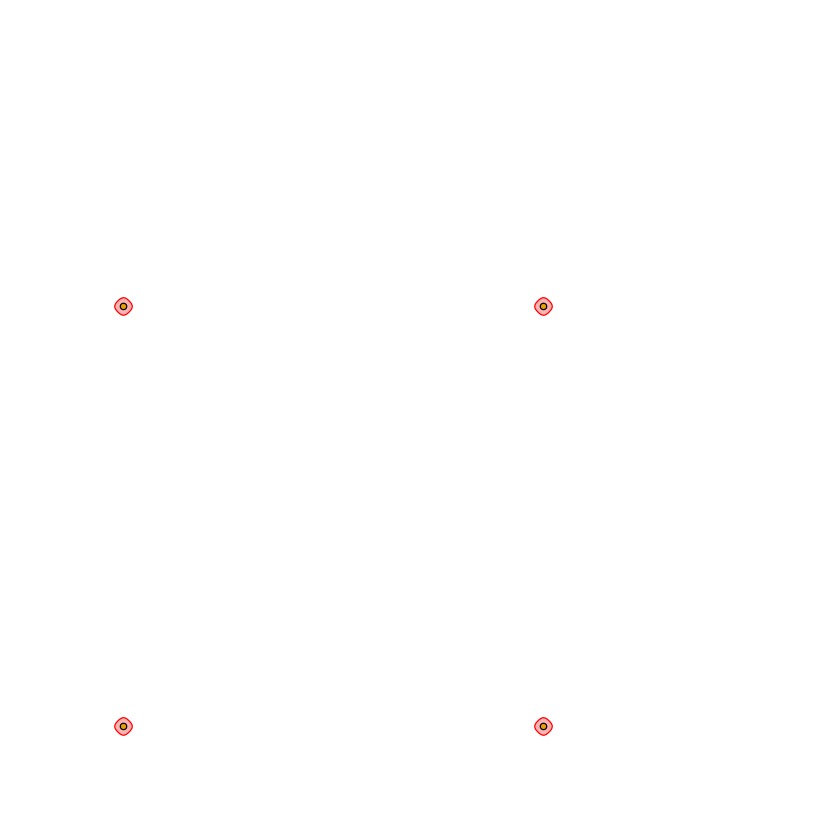

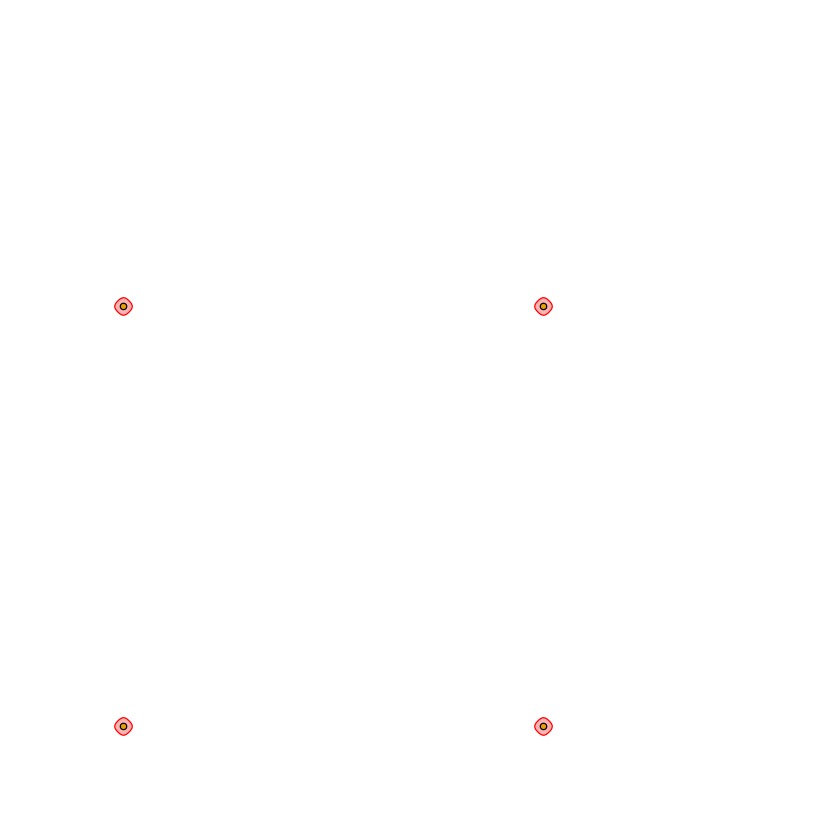

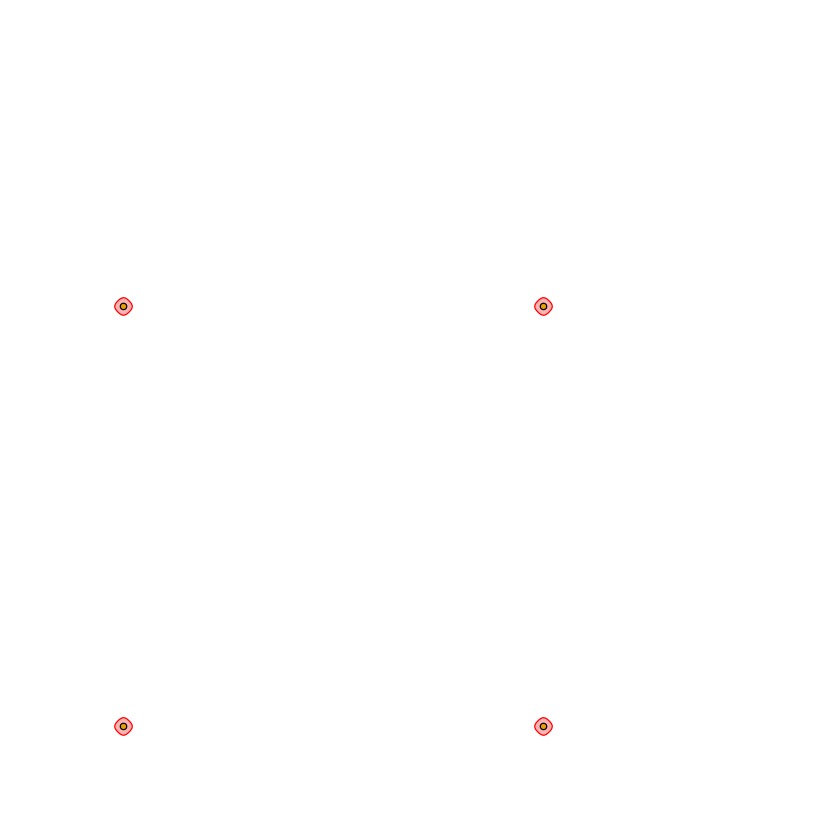

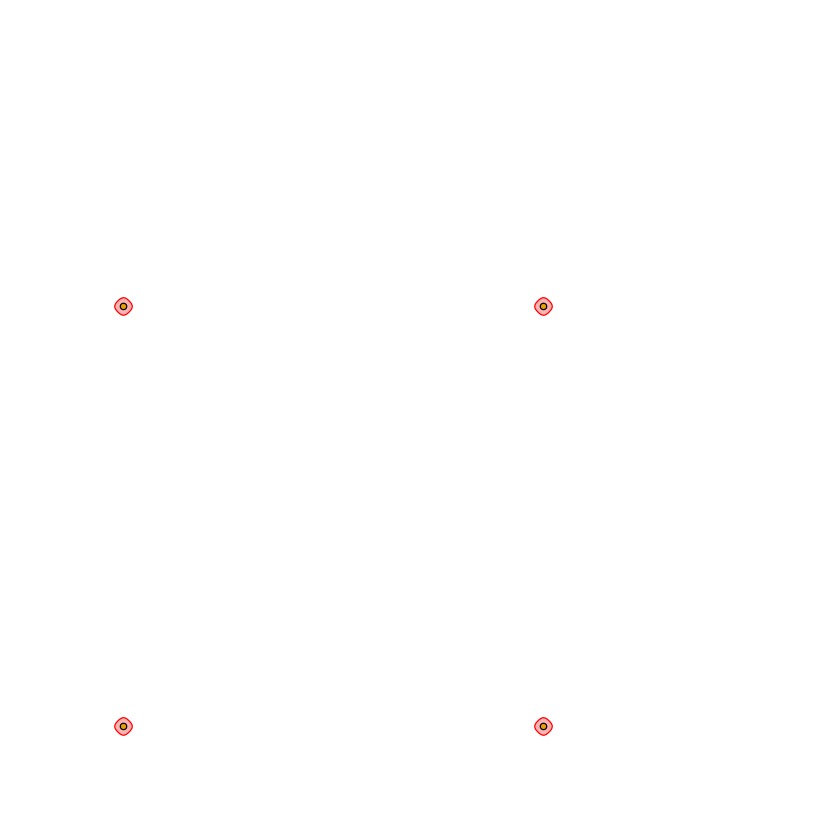

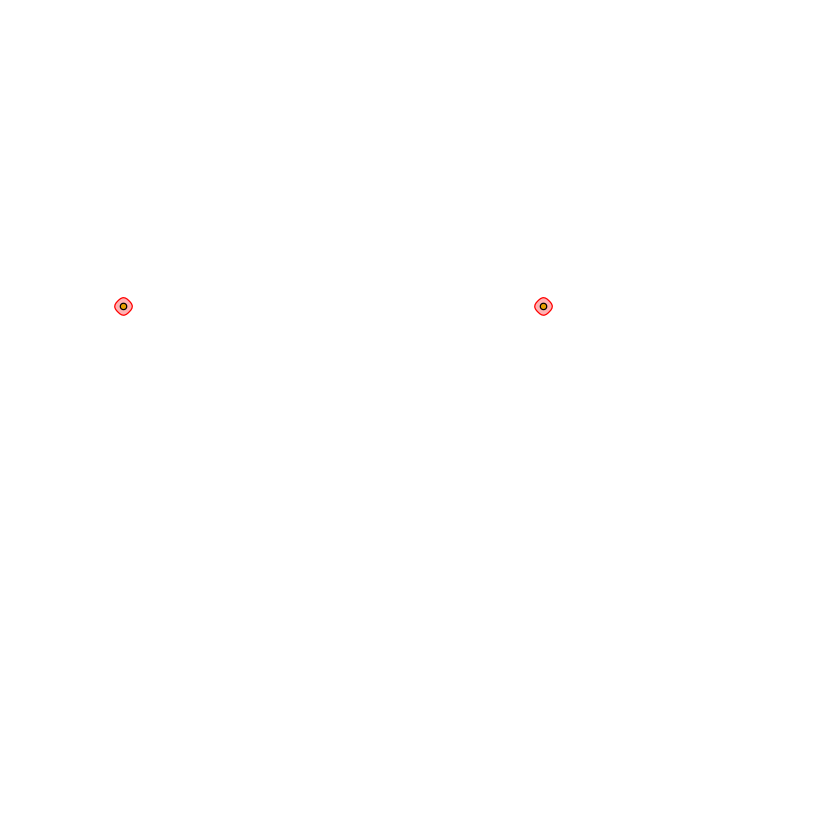

In [ ]:
#It is possible to plot multiple clusters using the plotly package:

par(mfrow=c(2,2))
#par(mar = rep(2, 3))
for(i in 2:length(out)) {
  plot(betweenness_sub[[i]], out[[i]],vertex.size=6,
edge.color="gray80",vertex.label=NA, layout=layout.kamada.kawai)
}

In [ ]:
ci<- table(sort(unique(V(WOS_graph)$Citations)))
ci


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  32   33   34   35   36   37   38   39   40   41   42   43   45   46   47   48 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  49   50   51   52   53   55   56   57   58   59   60   64   65   66   67   68 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  70   71   75   76   77   78   79   80   81   82   83   84   86   87   88   89 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  91   94   95   96   98   99  100  102  103  104  108  109  115  116  125  129 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 131  132  136  138  146  1

In [ ]:
ci<- sort(unique(V(l)$Sector))
ci

[1] "SECS-S/01" "SECS-S/02" "SECS-S/03" "SECS-S/04" "SECS-S/05"

In [ ]:
#get italian reserchers as a subgraph who are in sector 1.
it <- which(V(WOS_graph)$name %in% Italiancodes_vec) 
# Extract subgraph of italian researchers only
l <- induced.subgraph(graph=WOS_graph,vids=it)

l3<-asNetwork(l)

l2=get.inducedSubgraph(l3,which(V(l)$Sector %in% c("SECS-S/02","SECS-S/03","SECS-S/04","SECS-S/05")))
l2
l3<-asIgraph(l3)

 Network attributes:
  vertices = 158 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 43 
    missing edges= 0 
    non-missing edges= 43 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

In [ ]:
transitivity(l3)# the transivity opf this subgraph is 36% , meybe is not a good choice to model with this.

[1] 0.3664773

In [ ]:
#ergm

#A null model includes only the edges term.,it  ensures that the simulated networks have the same number of edges
#as the observed network. This can be seen by taking the logistic transformation
#of the edges parameter, which gives the overall density of network. 


#Creating the NULL model and the results of fitting the model are stored 
#in a model object for further examination and analysis.

#A null model includes only the edges term.

k<- ergm(l2~edges) # fit model
summary(k) # look in more depth
k$coef #get all the coef inn the model

# We get a negative edge parameter since the network is rather sparse.
## The edge parameter here is the log of the edge odds, i.e. log(#dyads-w-edge/#dyads-no-edge)



Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 





Summary of model fit

Formula:   l2 ~ edges

Iterations:  8 out of 20 

Monte Carlo MLE Results:
      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges  -5.6610     0.1528      0  -37.06   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 17194  on 12403  degrees of freedom
 Residual Deviance:   573  on 12402  degrees of freedom
 
AIC: 575    BIC: 582.4    (Smaller is better.) 

edges 
-5.661021

In [ ]:
gden(WOS_NET)
gden(l2)
plogis(coef(k))  # conditional probability of having a tie is equal to dencuty 

[1] 0.03052857

[1] 0.003466903

edges 
0.003466903

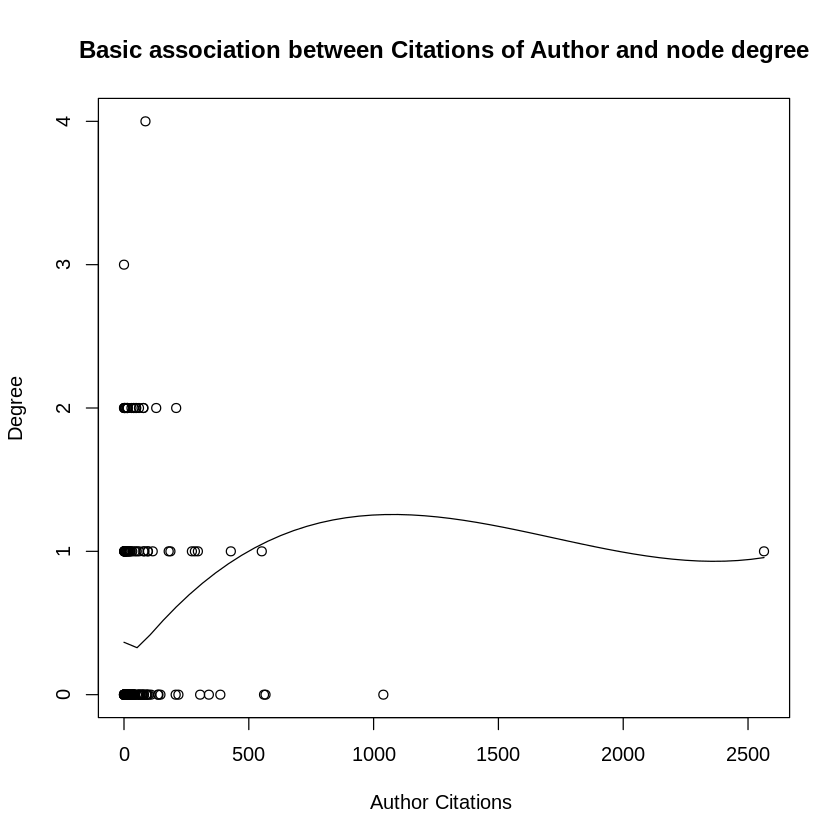

In [ ]:
#Including Node Attributes
#Once a null model is obtained, more interesting models can be fit using a wide
#variety of predictors

scatter.smooth(l2 %v% 'Citations',
degree(l2,gmode='graph'),
xlab='Author Citations ',
ylab='Degree',
main="Basic association between Citations of Author and node degree")


In [ ]:
#Testing node characteristic main effects
#Let's test whether the edge probabilities are a function of Citations:
#we want to see if that athors with a high # of citation are connected together

#there is a  estimation around 44% for isolated node. and also for citation the estime is positive, but very small number
k4<- ergm(l2 ~ edges + isolates)
summary(k4)

mcmc.diagnostics(k4)
#we are aiming for the trace to look like a hairy caterpillar. and 
 #there was a burn-in  the plot.

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.04993.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.0002384.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.




Summary of model fit

Formula:   l2 ~ edges + isolates

Iterations:  2 out of 20 

Monte Carlo MLE Results:
         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     -5.1567     0.3626      0 -14.223   <1e-04 ***
isolates   0.4561     0.3182      0   1.433    0.152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 17194  on 12403  degrees of freedom
 Residual Deviance:   571  on 12401  degrees of freedom
 
AIC: 575    BIC: 589.9    (Smaller is better.) 

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean    SD Naive SE Time-series SE
edges    0.01758 7.643   0.1194         0.1251
isolates 0.04956 8.708   0.1361         0.1400

2. Quantiles for each variable:

         2.5% 25% 50% 75% 97.5%
edges     -16  -5   0   5    14
isolates  -17  -6   0   6    17


Sample statistics cross-correlations:
             edges  isolates
edges     1.000000 -0.932606
isolates -0.932606  1.000000

Sample statistics auto-correlation:
Chain 1 
                edges      isolates
Lag 0     1.000000000  1.0000000000
Lag 1024  0.018722354  0.0047819680
Lag 2048  0.056720686  0.0624630276
Lag 3072 -0.026769589 -0.0381464475
Lag 4096  0.007715946  0.0077548795
Lag 5120  0.013831159  0.0004526794

Sample statistics burn-in diagnostic (Geweke):
Chain 1 

Fraction in 1st

Warning message:
“`set_attrs()` is deprecated as of rlang 0.3.0
This warning is displayed once per session.”
Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.06224.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.00119.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.




Summary of model fit

Formula:   l2 ~ edges + isolates + nodecov("Citations")

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                    Estimate Std. Error MCMC % z value Pr(>|z|)    
edges             -5.1850241  0.3663600      0 -14.153   <1e-04 ***
isolates           0.4428217  0.3161783      0   1.401    0.161    
nodecov.Citations  0.0001047  0.0003661      0   0.286    0.775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 17194.2  on 12403  degrees of freedom
 Residual Deviance:   570.9  on 12400  degrees of freedom
 
AIC: 576.9    BIC: 599.2    (Smaller is better.) 

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                      Mean       SD Naive SE Time-series SE
edges              -0.2380    7.704   0.1204         0.1204
isolates            0.1448    8.724   0.1363         0.1363
nodecov.Citations -93.2483 3063.828  47.8723        46.4529

2. Quantiles for each variable:

                      2.5%   25%   50%  75% 97.5%
edges               -16.00    -5   0.0    5    14
isolates            -16.62    -6   0.0    6    17
nodecov.Citations -7376.62 -1817 374.5 2116  4388


Sample statistics cross-correlations:
                       edges   isolates nodecov.Citations
edges              1.0000000 -0.9318467         0.4513489
isolates          -0.9318467  1.0000000        -0.4077853
nodecov.Citations  0.4513489 -0.4077853         1.0000000

Sample statistics auto

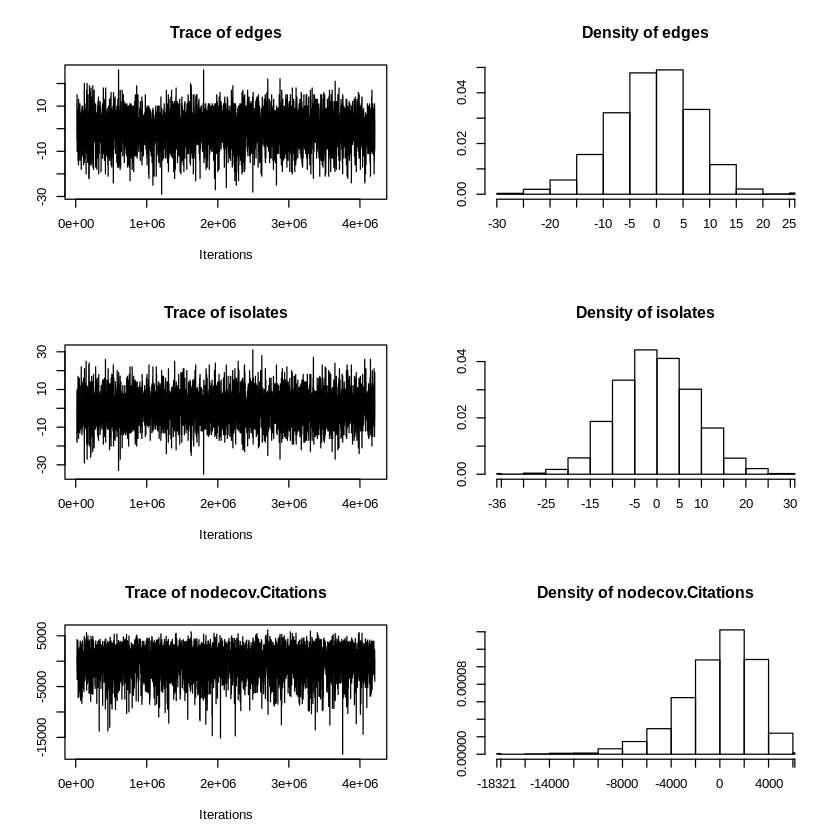

In [ ]:
k3<- ergm(l2 ~ edges + isolates+nodecov('Citations') )
summary(k3)

mcmc.diagnostics(k3)

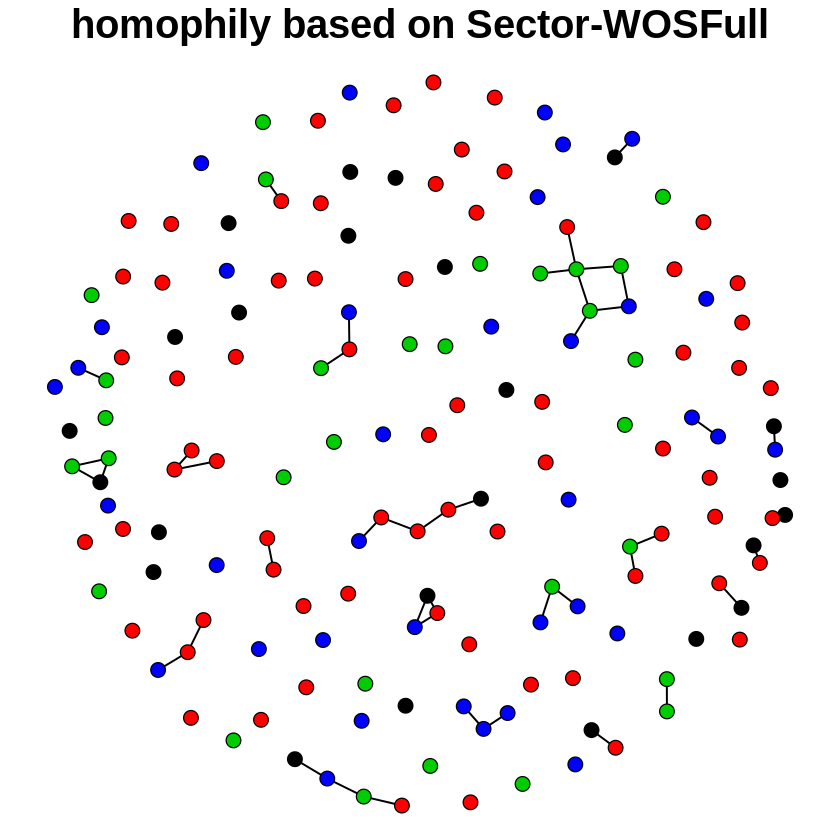

In [ ]:
#lets see that are ties more or less likely between network
#members who are similar to each other on some characteristic (homophily) or not
mesa <- l2
#par(mfrow=c(2,2))
par(mar=c(0,0,2,0))


#plot(mesa,main="Network in sector 1")
#plot(mesa, vertex.col='Citations',main="homophily based on Citations")
#legend('bottomleft',fill=7:12,legend=paste('Citations',7:12),cex=0.75)
#plot(mesa, vertex.col='Author.Type',main="plot based on Author.Type")
#plot(mesa, vertex.col='NumDocs',main="homophily based on NumDocs")
#plot(mesa, vertex.col='References',main="homophily based on References")
plot(mesa, vertex.col='Sector')

title(main="homophily based on Sector-WOSFull",cex.main=2)


In [ ]:
plot(mesa, vertex.col="blue")
title(main="italian resercher in sector 2:5-WOSFull",cex.main=2)


In [ ]:
# SIMULATION

#Once we estimated the model we define a prob. 
#distribution on all possible networks of a given size (= to the observed size). 

# If the model fits the data well we should expect that
# we can draw form this distribution network similar to the observed one (on average)

# For simulation we can use this function

k3.sim <- simulate(k3,nsim=10)
k3.sim 

Number of Networks: 10 
Model: l2 ~ edges + isolates + nodecov("Citations") 
Reference: ~Bernoulli 
Constraints: TNT NULL 158  , 1    , 157  , 2    , 156  , 3    , 155  , 4    , 154  , 5    , 153  , 6    , 152  , 7    , 151  , 8    , 150  , 9    , 149  , 10   , 148  , 11   , 147  , 12   , 146  , 13   , 145  , 14   , 144  , 15   , 143  , 16   , 142  , 17   , 141  , 18   , 140  , 19   , 139  , 20   , 138  , 21   , 137  , 22   , 136  , 23   , 135  , 24   , 134  , 25   , 133  , 26   , 132  , 27   , 131  , 28   , 130  , 29   , 129  , 30   , 128  , 31   , 127  , 32   , 126  , 33   , 125  , 34   , 124  , 35   , 123  , 36   , 122  , 37   , 121  , 38   , 120  , 39   , 119  , 40   , 118  , 41   , 117  , 42   , 116  , 43   , 115  , 44   , 114  , 45   , 113  , 46   , 112  , 47   , 111  , 48   , 110  , 49   , 109  , 50   , 108  , 51   , 107  , 52   , 106  , 53   , 105  , 54   , 104  , 55   , 103  , 56   , 102  , 57   , 101  , 58   , 100  , 59   , 99   , 60   , 98   , 61   , 97   , 62   , 96   , 63 

In [ ]:

k4.sim <- simulate(k4,nsim=10)
k4.sim 

Number of Networks: 10 
Model: l2 ~ edges + isolates 
Reference: ~Bernoulli 
Constraints: TNT NULL 158  , 1    , 157  , 2    , 156  , 3    , 155  , 4    , 154  , 5    , 153  , 6    , 152  , 7    , 151  , 8    , 150  , 9    , 149  , 10   , 148  , 11   , 147  , 12   , 146  , 13   , 145  , 14   , 144  , 15   , 143  , 16   , 142  , 17   , 141  , 18   , 140  , 19   , 139  , 20   , 138  , 21   , 137  , 22   , 136  , 23   , 135  , 24   , 134  , 25   , 133  , 26   , 132  , 27   , 131  , 28   , 130  , 29   , 129  , 30   , 128  , 31   , 127  , 32   , 126  , 33   , 125  , 34   , 124  , 35   , 123  , 36   , 122  , 37   , 121  , 38   , 120  , 39   , 119  , 40   , 118  , 41   , 117  , 42   , 116  , 43   , 115  , 44   , 114  , 45   , 113  , 46   , 112  , 47   , 111  , 48   , 110  , 49   , 109  , 50   , 108  , 51   , 107  , 52   , 106  , 53   , 105  , 54   , 104  , 55   , 103  , 56   , 102  , 57   , 101  , 58   , 100  , 59   , 99   , 60   , 98   , 61   , 97   , 62   , 96   , 63   , 95   , 64   , 94   

In [ ]:
class(k3.sim)

#It's a list of objects

length(k3.sim)

[1] "network.list"

[1] 10

In [ ]:


#To get the first object in a list:

k3.sim[[1]]
l2
gden(l2)
gden(k3.sim[[1]])

 Network attributes:
  vertices = 158 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 36 
    missing edges= 0 
    non-missing edges= 36 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

No edge attributes

 Network attributes:
  vertices = 158 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 43 
    missing edges= 0 
    non-missing edges= 43 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

[1] 0.003466903

[1] 0.002902524

In [ ]:


#To get the first object in a list:

k4.sim[[1]]
l2
gden(l2)
gden(k4.sim[[1]])

 Network attributes:
  vertices = 158 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 55 
    missing edges= 0 
    non-missing edges= 55 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

No edge attributes

 Network attributes:
  vertices = 158 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 43 
    missing edges= 0 
    non-missing edges= 43 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

[1] 0.003466903

[1] 0.004434411

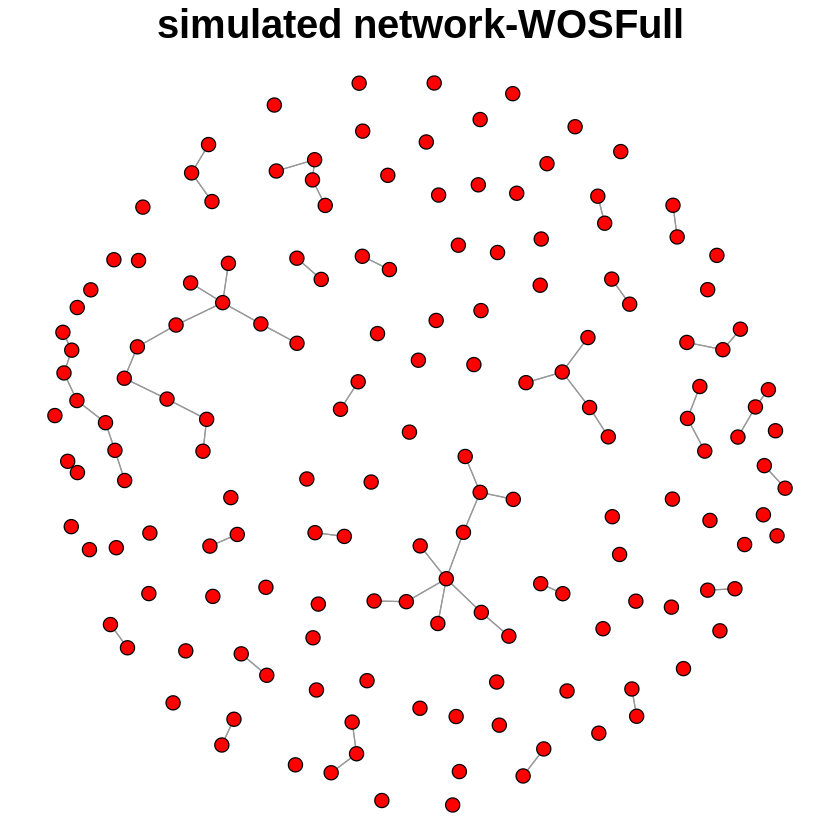

In [ ]:
par(mar=c(0,0,2,0))
gplot(k3.sim[[1]], gmode = "graph",edge.col="gray60",edge.lwd=0.02,
      thresh=0.01,jitter=TRUE)

#Ofc we should expect that differences between
# this drawn network and the observed is given by random fluctuations only
title(main="simulated network-WOSFull",cex.main=2)


Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.06146.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by < 0.0001.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



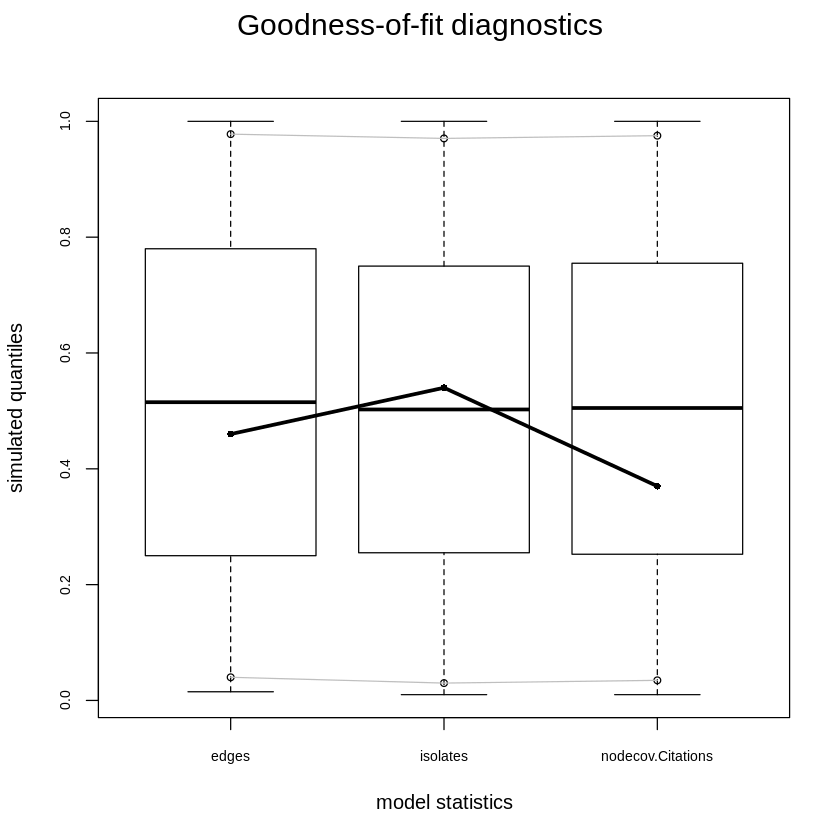

In [ ]:
#Goodness-of-fit for minimum geodesic distance
#Goodness-of-fit for edgewise shared partner
mesamodel.02 <- ergm(l2~edges+ isolates+nodecov('Citations'))
mesamodel.02.gof <- gof(mesamodel.02~degree)
plot(mesamodel.02.gof)